# **Declaração do Problema** | **Problem Statement**


---

#### **Contexto do Negócio**

Compreender como as vendas são afetadas por uma variedade de fatores é essencial para descobrir onde melhorar. Quando se trata de comidas e bebidas, dados climáticos podem ser cruciais para uma melhor compreensão da dinâmica de vendas de cada produto. Por exemplo, durante os períodos mais frios, os clientes podem preferir tipos de café mais cremosos, o que pode reduzir as vendas de outros tipos de café.

Uma empresa líder no setor de café, com uma base de clientes em rápido crescimento, busca obter insights mais profundos sobre quais são os fatores que afetam as vendas de café e como prever os meses futuros. A empresa reconhece que compreender a variação na preferência de café ao longo do tempo fornece informações importantes para se preparar para a demanda, criar melhores estratégias de marketing personalizadas e até mesmo criar programas de fidelidade. Esses insights podem ajudar a enfrentar desafios comerciais críticos, como melhorar a eficácia das campanhas de marketing, identificar grupos de clientes de alto valor e promover relacionamentos de longo prazo com os clientes.

Com a intensificação da concorrência, afastar-se das estratégias genéricas e adotar abordagens mais segmentadas e personalizadas é essencial para manter uma vantagem competitiva.

---

#### **Objetivos**
Em um esforço para otimizar as vendas, a eficiência do marketing e melhorar a experiência do cliente, a empresa embarcou em uma missão para identificar os padrões distintos de cada tipo de café. Ao compreender as características, preferências e comportamentos dos clientes, a empresa visa:
1. Desenvolver campanhas de marketing personalizadas para aumentar as taxas de conversão.
2. Criar estratégias de retenção eficazes para clientes de alto valor.  
3. Otimizar a alocação de recursos, como gestão de estoque, estratégias de preços e layout das lojas.

Como um cientista de dados encarregado deste projeto, minha responsabilidade é analisar os dados de vendas de café fornecidos e fornecer insights acionáveis sobre as características de cada tipo de café.

---

#### **Dicionário dos dados**
O conjunto de dados inclui dados históricos de vendas de café, nomes dos cafés, preço e método de pagamento. Os principais atributos são:

1. **Informação Histórica**  
   - **date:** Data no formato padrão ano/mês/dia.  
   - **datetime:** Informação completa da data de venda, incluindo a hora da venda.
  

2. **Informação do Café**  
   - **coffee_name:** Nome do café.  
   - **money:** Preço do café.  
     

3. **Informação do Cliente**  
   - **cash_type:** Método de Pagamento.  
   - **card:** Número do Cartão (omitido por razões de segurança).


#### **Business Context**  
Understanding how sales are affected by a variety of factors is essential to find out where to improve. When it comes to foods and drinks, climate data can be crucial to have a better understanding of selling dynamics for each product. For instance, during colder times, clients might prefer creamy coffee types, which could drive down sales of other types of coffee.

A leading coffee company with a rapidly growing customer base seeks to gain deeper insights into what are the factors affecting coffee sales and how to predict months ahead. The company recognizes that understanding variation in coffee preference across time provides important information to be prepared for the demand, make better personalizing marketing strategies and even creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**
In an effort to optimize sales, marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct coffee type's patterns. By understanding the characteristics, preferences, and behaviors of clients, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, my responsibility is to analyze the given coffee sales data and provide actionable insights into the characteristics of each coffee type.  

---

#### **Data Dictionary**
The dataset includes historical coffee sales data, coffee names, price and paying method. Key attributes are:  

1. **Historical Information**  
   - **date:** Standard year/month/day .  
   - **datetime:** Complete sales date information, including hour of sales.  
  

2. **Coffee Information**  
   - **coffee_name:** Name of the coffee.  
   - **money:** Coffee price.  
     

3. **Client Information**  
   - **cash_type:** Method of payment.  
   - **card:** Card number (ommited for safe reasons).

## **Importando as bibliotecas necessárias** | **Importing necessary libraries**

In [ ]:
# Bibliotecas para ler e manipular dados
# Libraries to read and manipulate data
import pandas as pd
import numpy as np

# Bibliotecas para visualização dos dados
# libaries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Remoção de limites de número de colunas e definição do número de linhas mostradas na tela
# Removal of the limit for the number of displayed columns and defining number of rows to be displayed on the screen
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Bibliotecas relacionadas a clusterização
# Libraries associated iwth clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Bibliotecas para análise exploratória e estatística
# Libraries for exploratory and statistical analysis
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Fazendo o upload do dados** | **Loading the data**

In [ ]:
from google.colab import drive  # Connecting Google Colab with Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### 🔍 Primeiros passos | First steps

Entendendo e estruturando dados, e criação de novas variáveis.
Understanding and structuring data, and feature engineering

In [ ]:
# Carregando a tabela CSV como uma dataframe da biblioteca pandas
# Loading csv table as a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/coffee.csv")  # Loading csv table as a pandas dataframe https://www.kaggle.com/code/aymannegm/supermarket-sales-analysis

In [ ]:
# Checando informações estruturais dos dados
# Checking structural data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [ ]:
# Renomeando a coluna 'money' para 'price'
# Renaming colun 'money' to 'price'
data = data.rename(columns={'money': 'price'})

In [ ]:
# Removendo as colunas card e cash_type
# Removing card and cash_type columns
data= data.drop(columns=['card', 'cash_type'])

In [ ]:
# Checando por valores nulos em cada coluna
# Checking for missing values in each column
data.isna().sum()


date           0
datetime       0
price          0
coffee_name    0
dtype: int64

In [ ]:
# Checando por linhas duplicadas em cada coluna
# Checking for duplicated rows in each column
duplicated = data.duplicated().sum()
print (duplicated)

0


📝 **Observações:** Nós Temos 3636 dados de vendas de café e quatro variavéis para analisar. Não há valores nulos e nem duplicados. A coluna 'money' foi nomeada 'price' com o preço de cada café e a coluna card e cash_type foram excluídas.

📝 **Observations:** We have 3636 coffee sales data and four features to analyze. There's neither missing nor duplicated data. The column 'money' was renamed 'price' with every coffee price and columns 'card' and 'cash_type' were dropped.

**Criação de novas variáveis:** Aqui estamos criando novas variáveis referente à datas, estação do ano, tipo de dia (semana ou final de semana) e se o café leva ou não leite.

Posteriormente, criamos uma coluna de quantidade, onde cada linha equivale à 1 venda, agrupamos os dados por nome do café e data e somamos a quantidade de vendas por café em cada data.

**Feature engineering:** Here we are creating new features related to date, season, day type (week or weekend) and if the coffee has milk or not.

Furthermore, we create the 'Quantity' column, where each row is one sale, we aggregate by coffee name and date, and sum up the quantity sold each day for each coffee.

In [ ]:
# Transformando as colunas date e datetime para tipo data
# Transforming date and datetime columns to datetime type
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [ ]:
# Separando data em ano, mês, dia e hora
# Splitting date into year, month, day and hour
data["Order_day"] = data["datetime"].dt.day
data["Order_month"] = data["datetime"].dt.month
data["Order_year"] = data["datetime"].dt.year
data["Order_hour"] = data["datetime"].dt.hour


In [ ]:
# Criando variável day_type contendo informação de 'dia da semana ou final de semana'
# Creating a new feature day_type having information of 'weekday or weekend'
data['Day_Type'] = data['datetime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [ ]:
# Criando função que associa meses às estações do ano
# Creating function that associates months with seasons of the year
# Define a function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Aplicando a função e criando nova variável 'Season'
# Applying the function and creating a new column 'Season'
data['Season'] = data['datetime'].dt.month.apply(month_to_season)

In [ ]:
# Criando variável contendo nomes de cafés que possuem leite
# Creating a variable containing coffee names that have milk
with_milk = ["Americano with Milk", "Hot Chocolate", "Latte", "Cortado", "Cappuccino"]

In [ ]:
# Criando variável has_milk com sim ou não em relação a conter leite
# Creating the feature has_milk with yes or no in relation to having milk
data["has_milk"] = data["coffee_name"].apply(lambda x: "Yes" if x in with_milk else "No")


In [ ]:
# Criando variável 'Quantity' contendo valor 1 indicando que cada linha conta como 1 venda
# Creating Quantity feature having the value 1 indicating that each row is 1 sale
data['Quantity'] = 1

In [ ]:
# Agrupando dados por data e nome do café e somando a coluna quantidade em novo dado
# Grouping data by date and coffee name and summing up the quantity column into a new variable
daily_quantity = data.groupby(['date', 'coffee_name'], as_index=False).agg({
    'Quantity': 'sum'
})

# Agrupando os dados originais com as demais colunas
# Grouping original data with other columns
other_columns = ['price', 'has_milk', 'Order_day', 'Order_month', 'Order_year', 'Season', 'Day_Type']
first_occurrences = data.groupby(['date', 'coffee_name'], as_index=False)[other_columns].first()

# Mesclando os dados originais agrupando com dados de quantidade diária para cada café em cada data
# Combining the grouped original data with quantities for each coffee at each day
daily_data = pd.merge(first_occurrences, daily_quantity, on=['date', 'coffee_name'])

# Renomeando a coluna 'quantidade' para 'vendido diário'
# Renaming 'Quantity' to 'Daily_Sold'
daily_data.rename(columns={'Quantity': 'Daily_Sold'}, inplace=True)

In [ ]:
# Criando nova variável 'vendas diárias' pela multiplicação do preço do café pela quantidade vendida
# Creating a new feature of daily sales multiplying coffee price by daily quantity sold
daily_data['Daily_sales'] = daily_data['price']*daily_data['Daily_Sold']

In [ ]:
# Estatística descritiva das variavéis numéricas
# Statistical description of numerical features
daily_data.describe()

date        price    Order_day  Order_month  \
count                           1711  1711.000000  1711.000000  1711.000000   
mean   2024-09-20 16:53:18.129748736    31.680479    15.565167     6.386908   
min              2024-03-01 00:00:00    18.120000     1.000000     1.000000   
25%              2024-06-15 12:00:00    27.920000     8.000000     3.000000   
50%              2024-09-28 00:00:00    32.820000    15.000000     6.000000   
75%              2024-12-26 12:00:00    35.760000    23.000000    10.000000   
max              2025-03-23 00:00:00    40.000000    31.000000    12.000000   
std                              NaN     5.274483     8.628204     3.505206   

        Order_year   Daily_Sold  Daily_sales  
count  1711.000000  1711.000000  1711.000000  
mean   2024.233197     2.125073    67.489947  
min    2024.000000     1.000000    18.120000  
25%    2024.000000     1.000000    32.820000  
50%    2024.000000     2.000000    51.920000  
75%    2024.000000     3.000000    86.700000  
max    2025.000000    12.000000   339.480000  
std       0.422990     1.473992    47.482791

In [ ]:
# Estatística descritiva das variavéis categoricas
# Statistical description of categorical features
daily_data.describe(include='object').T

count unique                  top  freq
coffee_name  1711      8  Americano with Milk   316
has_milk     1711      2                  Yes  1217
Season       1711      4               Spring   489
Day_Type     1711      2              Weekday  1257

In [ ]:

daily_data.head(10)

date          coffee_name  price has_milk  Order_day  Order_month  \
0 2024-03-01            Americano   28.9       No          1            3   
1 2024-03-01  Americano with Milk   33.8      Yes          1            3   
2 2024-03-01                Cocoa   38.7       No          1            3   
3 2024-03-01        Hot Chocolate   38.7      Yes          1            3   
4 2024-03-01                Latte   38.7      Yes          1            3   
5 2024-03-02            Americano   28.9       No          2            3   
6 2024-03-02  Americano with Milk   33.8      Yes          2            3   
7 2024-03-02                Latte   40.0      Yes          2            3   
8 2024-03-03            Americano   28.9       No          3            3   
9 2024-03-03  Americano with Milk   33.8      Yes          3            3   

   Order_year  Season Day_Type  Daily_Sold  Daily_sales  
0        2024  Spring  Weekday           1         28.9  
1        2024  Spring  Weekday           4        135.2  
2        2024  Spring  Weekday           1         38.7  
3        2024  Spring  Weekday           3        116.1  
4        2024  Spring  Weekday           2         77.4  
5        2024  Spring  Weekend           3         86.7  
6        2024  Spring  Weekend           3        101.4  
7        2024  Spring  Weekend           1         40.0  
8        2024  Spring  Weekend           1         28.9  
9        2024  Spring  Weekend           2         67.6

📝 **Observações:**

*   Média do preço de todos os cafés é 31.68 dólares
*   Média dos vendidos diáriamente (quantidade) é 2.12
*   Média das vendas diárias é 67.48$
*   Nós temos 8 tipos de café diferentes
*   Nós temos dados para todas as estações do ano
*   Cafés contendo leite foram os mais vendidos
*   Café Americano com leite foi o mais vendido

📝 **Observations:**

*   Mean price of all coffees is 31.68$
*   Mean daily sold (quantity) is 2.12

*   Mean daily sales is 67.48$
*   We have 8 different coffees
*   We have data for all seasons of the year
*   Coffees that contain milk were the mostly sold
*   Americano with Milk was the coffee mostly sold






In [ ]:
# Fazendo cópia dos dados em novo objeto
# Copying the data into a new variable
data_copy = daily_data.copy()

## **Análise de dados exploratória** | **Exploratory Data Analysis**


### 🔍 Análise de dados univariada | Univariate data analysis. Análise de dados univariada



⚠️**Análise da distribuição das variáveis numéricas:** Aqui vamos checar se há outliers (dados extremos) e o comportamento geral de cada variável numérica.

⚠️**Distribution analysis of numerical features:** Here we will check for outliers (extreme values) and the general behaviour of each numerical feature.

In [ ]:
# Selecionando apenas variáveis numéricas e considerando apenas o quartil 25 e 75
# Selecting only numerical features and considering only quantile 25th and 75th percentile
Q1= daily_data.select_dtypes(include=np.number).quantile(0.25)
Q3= daily_data.select_dtypes(include=np.number).quantile(0.75)

In [ ]:
# Calculando a porcentagem de outliers para cada variável
# Calculating outlier percentage for each feature
IQR = Q3 - Q1

lower_whisker = (
 Q1 - 1.5* IQR
)

upper_whisker = (
 Q3 + 1.5* IQR
)

(
daily_data.select_dtypes(include=np.number)< lower_whisker | (daily_data.select_dtypes(include=np.number) > upper_whisker)).sum()/daily_data.select_dtypes(include=np.number).shape[0]*100

price          0.0
Order_day      0.0
Order_month    0.0
Order_year     0.0
Daily_Sold     0.0
Daily_sales    0.0
dtype: float64

In [ ]:
# Guardando apenas colunas numéricas em novo objeto
# Storing numerical columns into a new variable
data_num= daily_data.select_dtypes(include=np.number)

price
Skew : -0.55


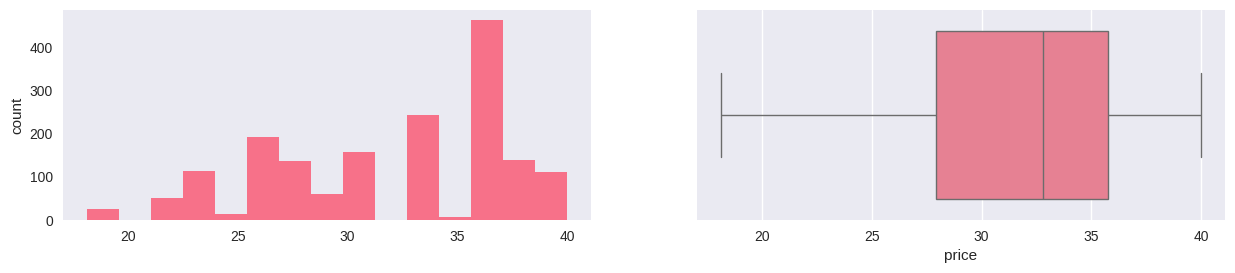

Order_day
Skew : 0.03


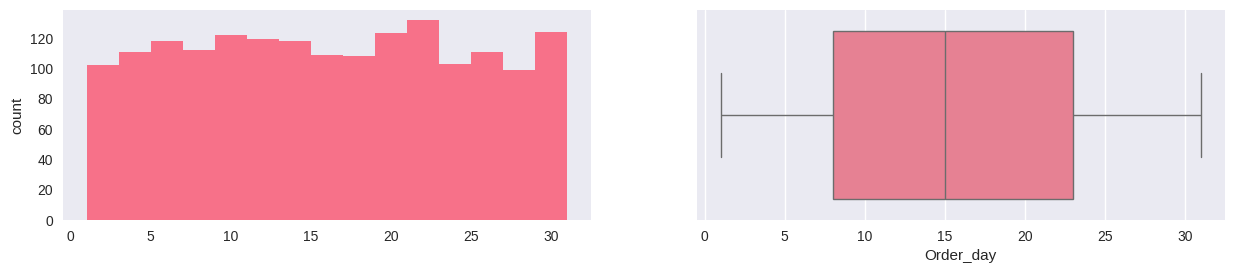

Order_month
Skew : 0.08


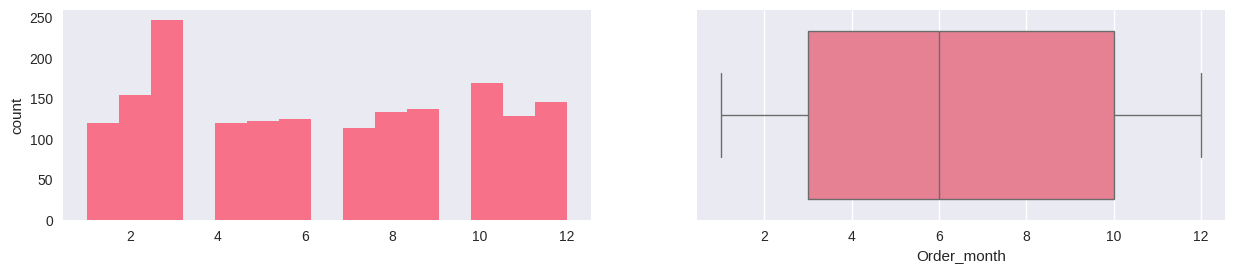

Order_year
Skew : 1.26


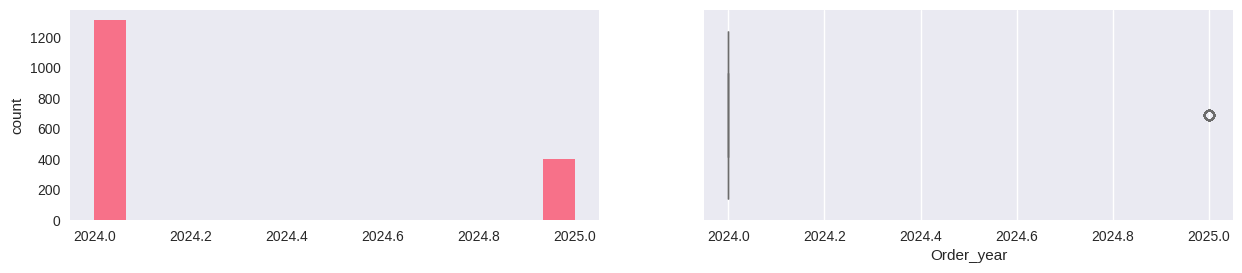

Daily_Sold
Skew : 2.04


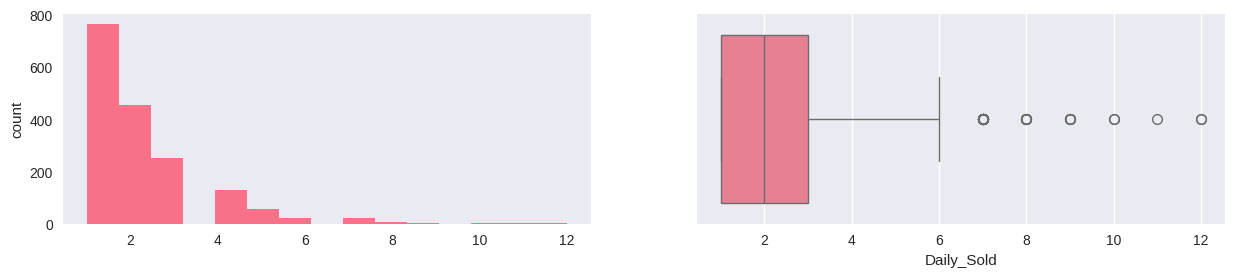

Daily_sales
Skew : 1.78


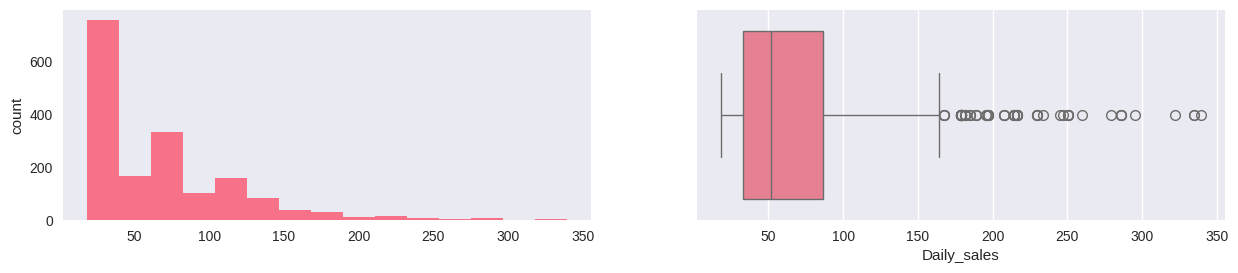

In [ ]:
# Histograma and boxplot de cada variável numérica contendo seus respectivos valores de assimetria
# Histogram and boxplot for each numerical feature having their respective skewness values
for col in data_num.columns:
    print(col)
    print('Skew :',round(data_num[col].skew(),2))
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    data_num[col].hist(bins=15, grid=False)
    plt.ylabel('count')
    plt.subplot(2,2,2)
    sns.boxplot(x=data_num[col])
    plt.show()

📝 **Observações:** No geral há pouquíssimos outliers e somente para as variáveis Daily_Sold e Daily_sales, havendo leve assimetria na distribuição dos dados, onde a quantidade vendida e o lucro das vendas diárias tem proporção maior de valores menores, indicando que somente em alguns dias específicos houve um aumento expressivo de vendas.

Além disso, há uniformidade nas vendas ao longo dos meses, não havendo meses com aumento ou decréscimo relevante.

📝 **Observations:** In general there are very few outliers and only for Daily_Sold and Daily_sales features, showing slight asymmetry, where daily quantity of sales and sales profit have a higher proportion of smaller values, indicating that only in few specific days there were an expressive increase in sales.

Moreover, there's sales uniformity across the months, no month having a relevant increase or decrease in sales.

### 🔍 Análise de dados bivariada | Bivariate data analysis

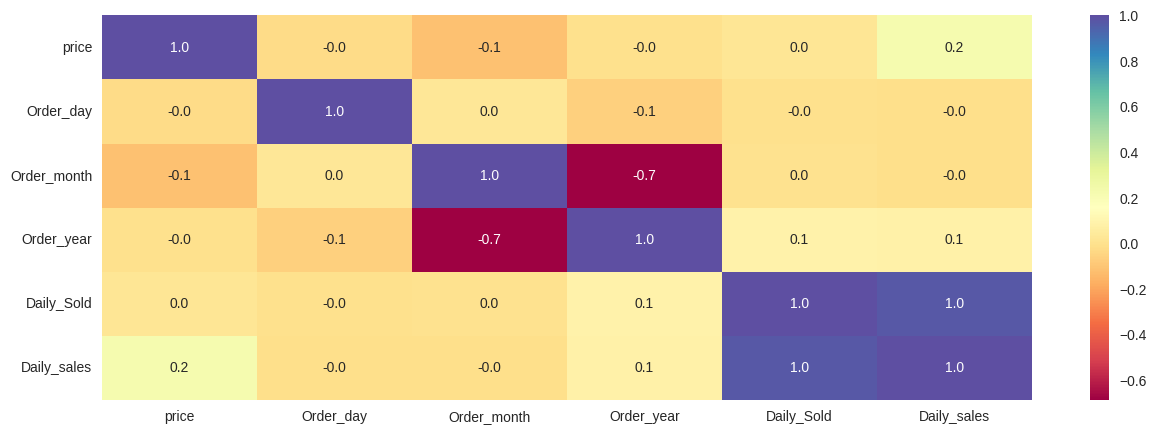

In [ ]:
# Mapa de calor da correlação entre as variáves numéricas
# Heatmap of the correlation between numerical variables
plt.figure(figsize=(15,5))
sns.heatmap(daily_data.select_dtypes(include='number').corr(),cmap='Spectral', annot=True, fmt='0.1f')
plt.show()

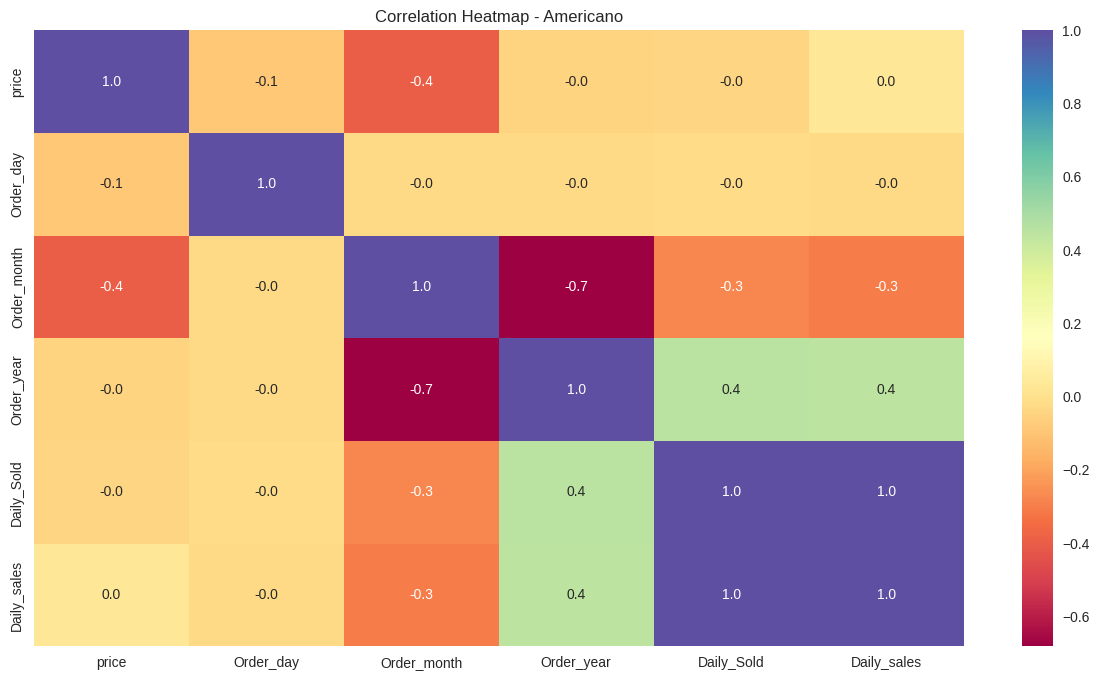

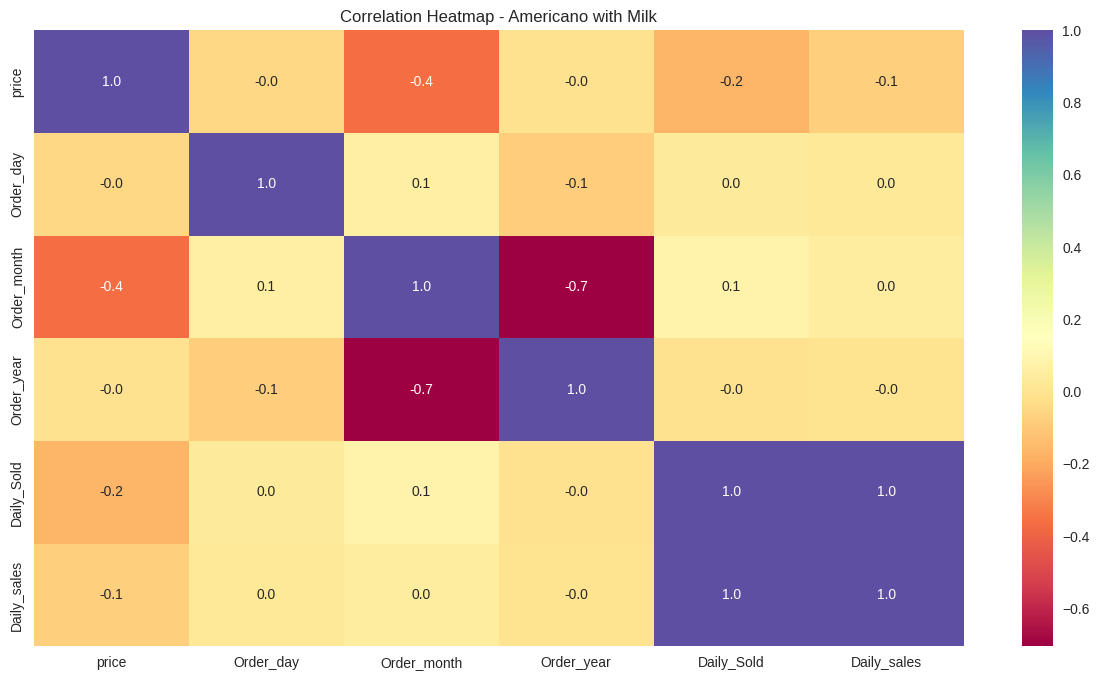

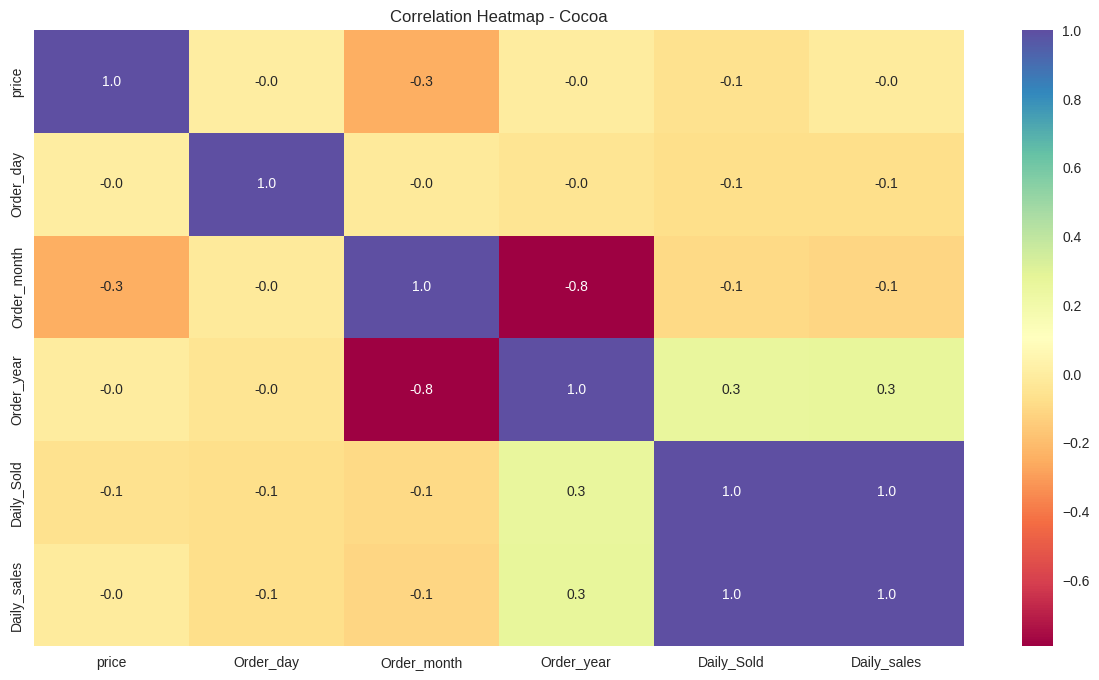

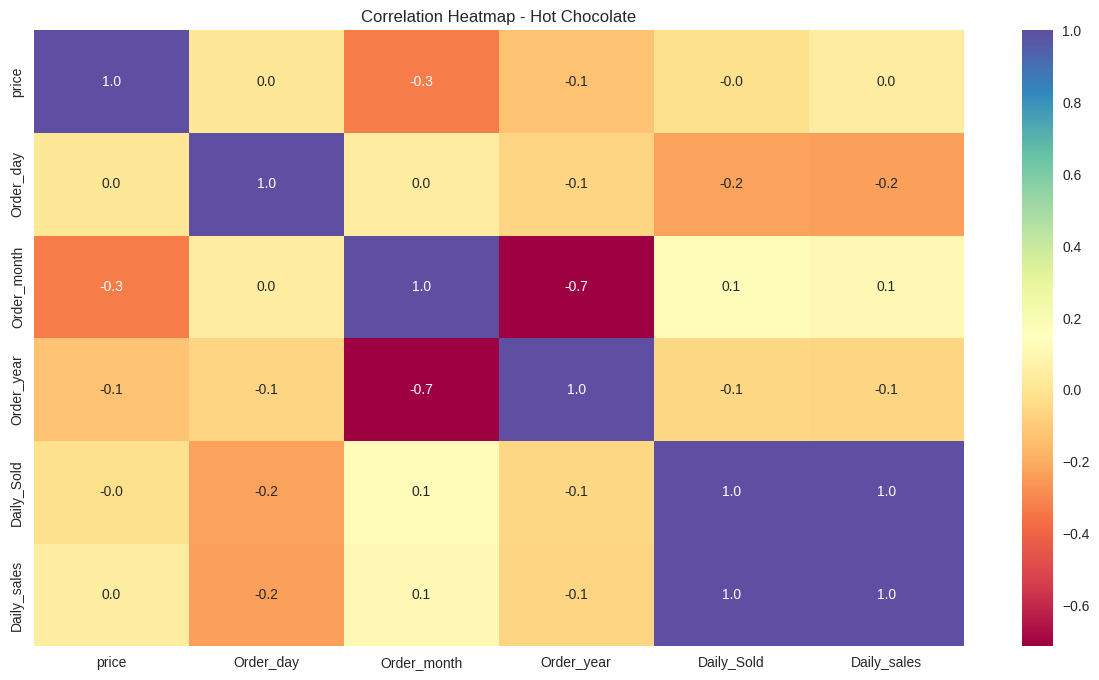

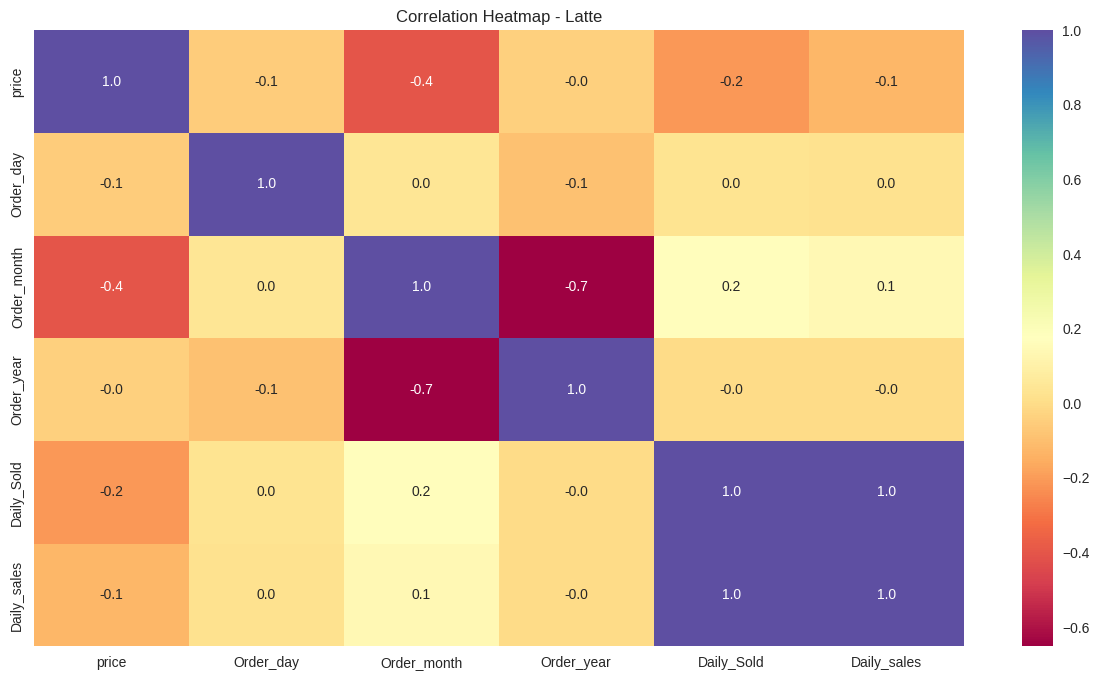

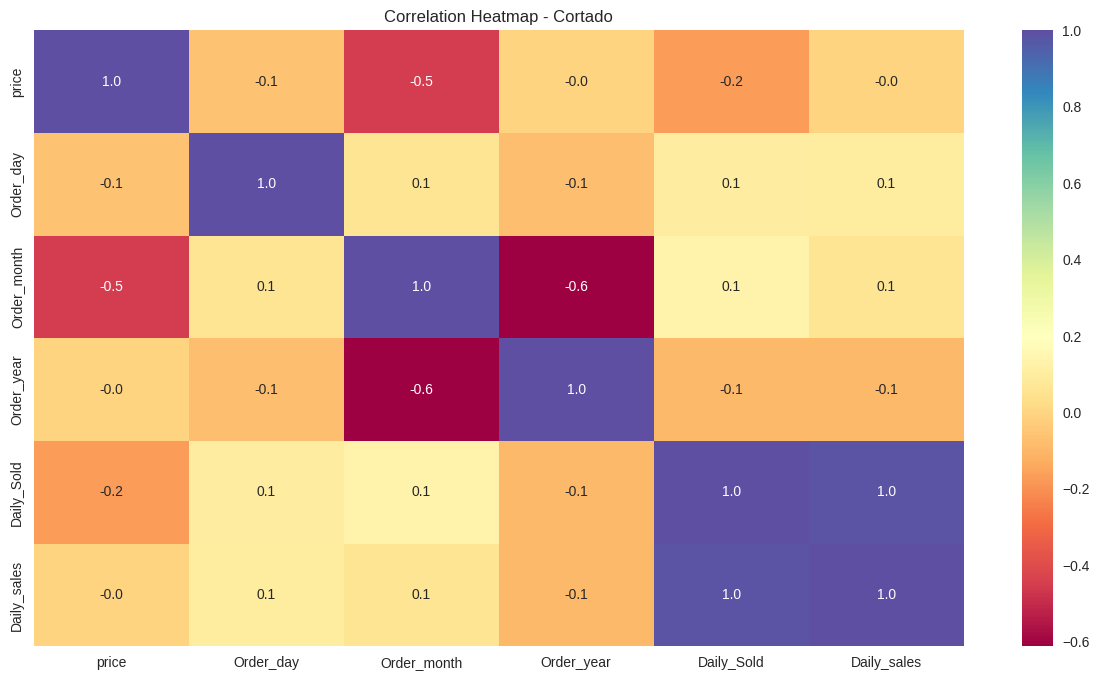

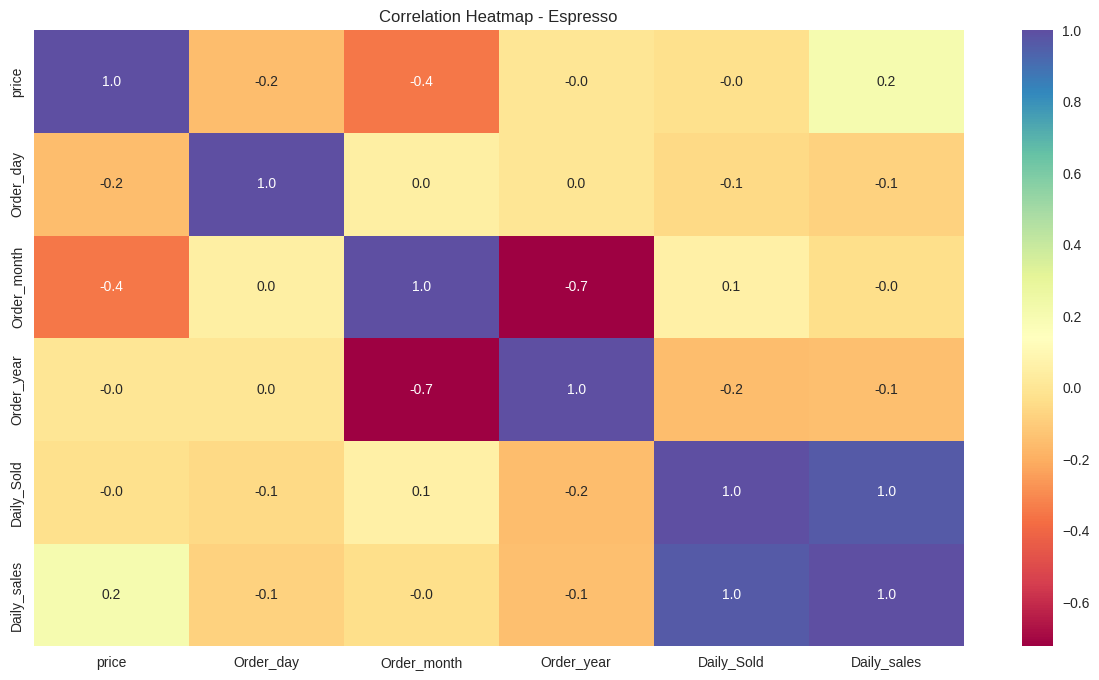

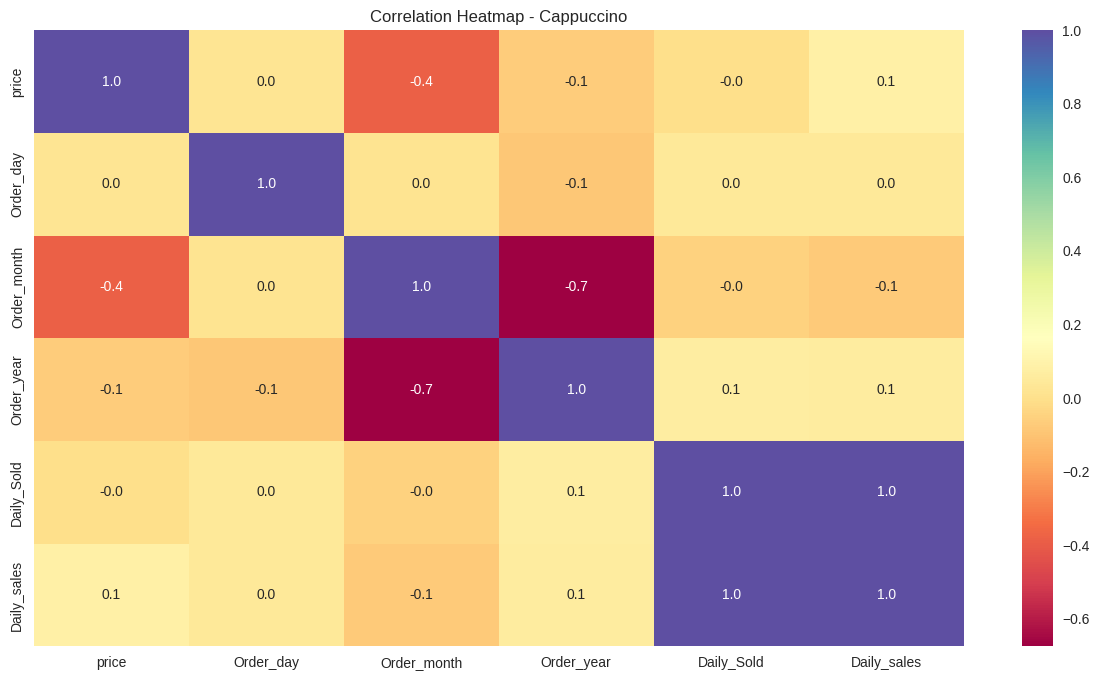

In [ ]:
# Mapa de calor da correlação entre as variáves numéricas para cada tipo de café
# Heatmap of the correlation between numerical variables for each coffee type
for category in daily_data['coffee_name'].unique():
    # Filter numeric columns for this category
    data_cat = daily_data[daily_data['coffee_name'] == category]
    data_cat_num = data_cat.select_dtypes(include='number')  # only numeric columns

    # Plot heatmap
    plt.figure(figsize=(15,8))
    sns.heatmap(data_cat_num.corr(), cmap='Spectral', annot=True, fmt='.1f')
    plt.title(f'Correlation Heatmap - {category}')
    plt.show()

📝 **Observações:** No geral, existe apenas um padrão significativo, ele é negativo entre mês e ano, mas isso se da por conta de haver mais dados de 2024 do que de 2025. Dessa forma, este padrão geral não é relevante.

Por outro lado, quando realizamos a análise para cada café separadamente, vemos que no geral há um padrão de correlação negativa (por volta de -0.4) entre preço dos cafés e meses das vendas. Esse é um indicativo de que as vendas podem estar mudando ao longo do tempo.

📝 **Observations:** In general, there is only one significant pattern, it is negative between month and year, but that is due to having more data from 2024 than 2025. Therefore, such a general pattern is not relevant.

However, when we analyze each coffee individually, we see that there is a main pattern of negative correlation (around -0.4) between coffee price and order month. This is an indication that sales could be varying across time.

##### **Observação:** Aqui, nós vamos investigar a variação do preço e quantidade de vendas de acordo com os meses do ano.

##### **Observations:** Here, we will investigate price and quantity of sales variation according to year-month.

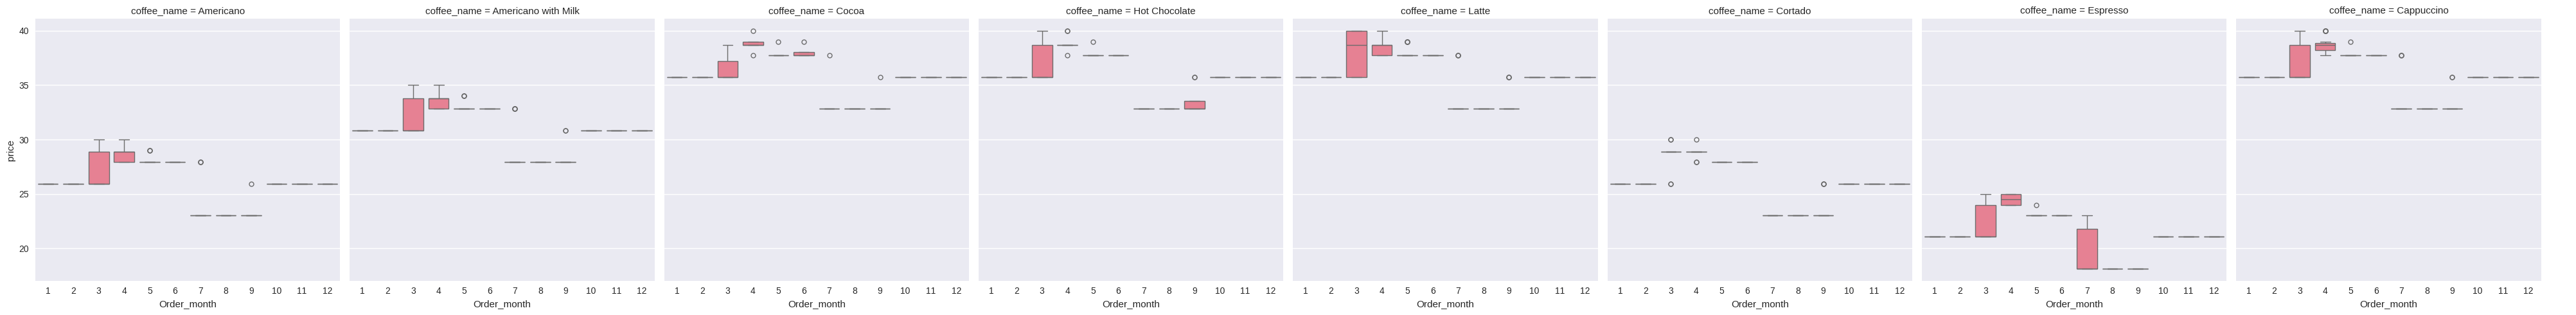

In [ ]:
# Boxplot de preço de café para cada café por mês
# Coffee price boxplot for each coffee by month
sns.catplot(daily_data, x='Order_month', y='price',col='coffee_name', kind='box')

In [ ]:
# Quantidade total vendida por mês e ano
# Total quantity sold by month and year
daily_data.groupby(['Order_year', 'Order_month'])['Daily_Sold'].sum().T # .groupby is combined with .count to sum the number of each particular education value, .T transposes the table

Order_year  Order_month
2024        3              206
            4              196
            5              267
            6              227
            7              237
            8              272
            9              344
            10             426
            11             259
            12             259
2025        1              201
            2              423
            3              319
Name: Daily_Sold, dtype: int64

📝 **Observações:** Há um padrão geral no qual os cafés são mais caros entre Janeiro e Junho, ficando mais baratos por alguns meses e depois levemente elevando seus preços mais ao fim do ano. Percebe-se uma leve tendência de mais vendas quando os preços estão relativamente mais baixos (meses 7, 8, 9, 10). Contudo, os dados de 2025 sugerem um possível novo padrão.

📝 **Observations:** There is a general pattern in which coffee is more expensive between January and June, being cheapear for a few months afterwards and then slightly increasing price in the end of the year. A slight tendency of more sales when prices are lower is noticed (months 7, 8, 9 , 10). Despite that, data from 2025 suggest a possible new pattern.

##### **Observação:** Agora iremos ver o comportamento de cada tipo de café.

##### **Observations:** Now we will see each coffee's behaviour.

In [ ]:
# Novo objeto com agrupamento e descrição estatistica dos dados por café
# New variable with grouping and statistical description of data for each coffee
grouped= daily_data.groupby('coffee_name')['price'].describe()
grouped

count       mean       std    min    25%    50%    75%  \
coffee_name                                                                   
Americano            249.0  26.121044  1.969969  23.02  25.96  25.96  27.92   
Americano with Milk  316.0  30.893987  1.959608  27.92  30.86  30.86  32.82   
Cappuccino           261.0  36.011034  1.984475  32.82  35.76  35.76  37.72   
Cocoa                141.0  35.775603  1.552776  32.82  35.76  35.76  35.76   
Cortado              173.0  25.996069  2.122419  23.02  23.02  25.96  27.92   
Espresso             104.0  21.060769  2.013166  18.12  21.06  21.06  23.02   
Hot Chocolate        160.0  36.098625  1.620929  32.82  35.76  35.76  36.25   
Latte                307.0  35.934853  2.044815  32.82  35.76  35.76  37.72   

                      max  
coffee_name                
Americano            30.0  
Americano with Milk  35.0  
Cappuccino           40.0  
Cocoa                40.0  
Cortado              30.0  
Espresso             25.0  
Hot Chocolate        40.0  
Latte                40.0

In [ ]:
# Checando a quantidade de lucro total por café
# Checking total profit per coffee
daily_data.groupby(['coffee_name'])['Daily_sales'].sum().T

coffee_name
Americano              15060.10
Americano with Milk    25273.02
Cappuccino             18037.44
Cocoa                   8679.44
Cortado                 7537.06
Espresso                2819.26
Hot Chocolate          10173.76
Latte                  27895.22
Name: Daily_sales, dtype: float64

In [ ]:
# Checando lucro total por café considerando tipo do dia
# Checking total profit per coffee considering day type
daily_data.groupby(['coffee_name','Day_Type'])['Daily_sales'].sum().T

coffee_name          Day_Type
Americano            Weekday     11963.46
                     Weekend      3096.64
Americano with Milk  Weekday     18355.24
                     Weekend      6917.78
Cappuccino           Weekday     12937.34
                     Weekend      5100.10
Cocoa                Weekday      6934.14
                     Weekend      1745.30
Cortado              Weekday      4981.74
                     Weekend      2555.32
Espresso             Weekday      2182.08
                     Weekend       637.18
Hot Chocolate        Weekday      7737.04
                     Weekend      2436.72
Latte                Weekday     21311.20
                     Weekend      6584.02
Name: Daily_sales, dtype: float64

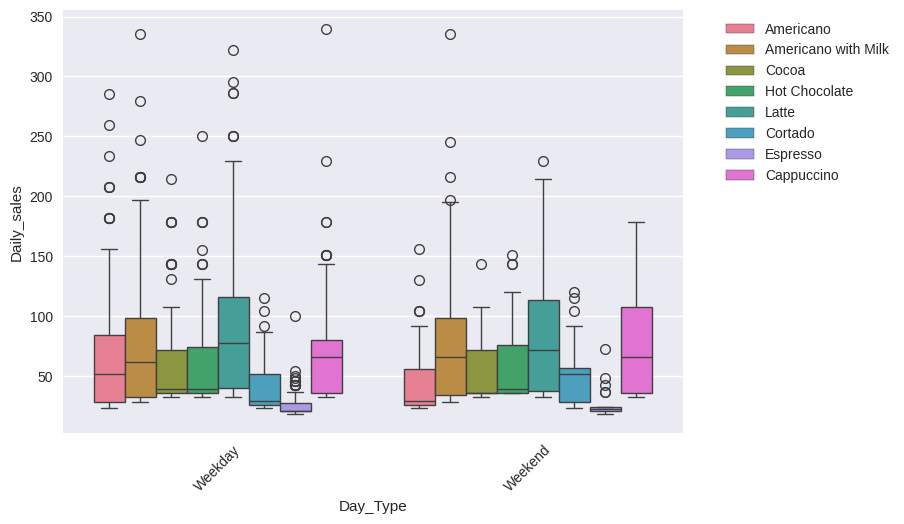

In [ ]:
# Boxplot do lucro total por café considerando tipo do dia
# Boxplot of total profit per coffee considering day type
sns.boxplot(data=daily_data, x='Day_Type', y='Daily_sales', hue='coffee_name')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # moves legend outside
plt.xticks(rotation=45)
plt.show()

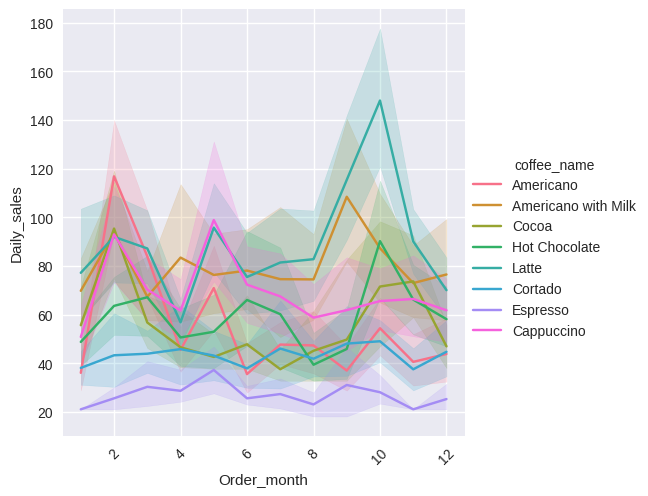

In [ ]:
# Boxplot do lucro total por mês para cada café
# Boxplot of total profit per month for each coffee
sns.relplot(data=daily_data, x='Order_month', y='Daily_sales', hue='coffee_name', kind='line')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # moves legend outside
plt.xticks(rotation=45)
plt.show()

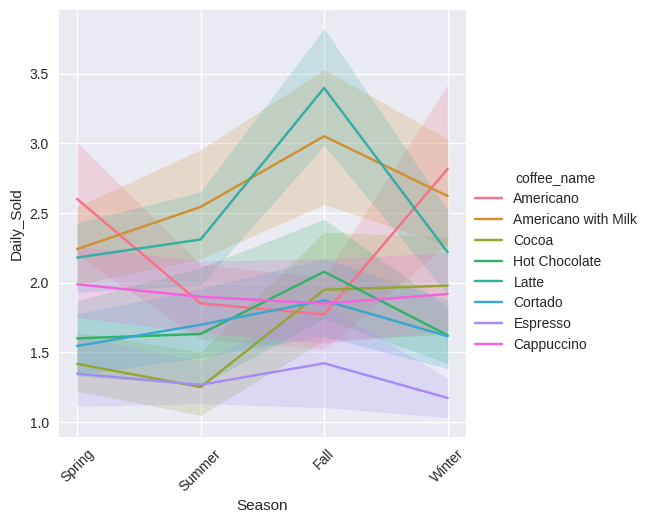

In [ ]:
# Boxplot do lucro total para cada café por estação do ano
# Boxplot of total profit for each coffee by season
sns.relplot(data=daily_data, x='Season', y='Daily_Sold', hue='coffee_name', kind='line')
plt.xticks(rotation=45)
plt.show()

📝 **Observações:**


*  Em média, Espresso é o mais barato e American with Milk o mais caro café

*   Latte gerou o maior lucro, de 27.895,22 dólares, seguido por Americano com Leite com 23.273,02 dólares. Espresso e Cortado com 2.819,26 e 7.537,06, respectivamente, geraram os menores lucros

*   Dias da semana apresentaram mais vendas para todos os cafés

*   Houve um padrão claro de variação em vendas diárias e vendidos diários ao longo dos meses e estações, incluindo alguns padrões opostos (por exemplo, American vendendo mais na Primavera e Inverno, enquanto Americano com leite e Latte sendo mais vendido no Outono)

📝 **Observations:**


*  In average, Espresso is the cheapest and Americano with Milk the most expensive coffees

*  Latte led to the highest profit of 27.895,22 dollars, followed by Americano with milk having 23.273,02 dollars. Espresso and Cortado with 2.819,26 and 7.537,06 dollars, respectively, generated the lowest profit

*   Weekdays had more total sales for all coffees

*   There was clear temporal variation of daily_sales and daily_sold across months and seasons, including some opposing patterns
and also daily_sold across seasons, including opposing patterns (for instance, Americano being sold more in spring and winter, while
americano with milk and Latte being more sold in Fall)



### 🔍 ANÁLISE ESTATÍSTICA | STATISTICAL ANALYSIS

**Análise estatística:** Aqui, iremos inicialmente construir um modelo linear, sendo as nossa variáveis dependentes Daily_sales e Daily_Sold, e nossas variáveis independentes (que irão explicar as mudanças nas dependentes) todas as restantes, exceto data. Também iremos analisar métricas de erro e R² do quanto o modelo se ajusta aos dados.

**Statistical analysis:** Here, we will initially build a linear model, our dependent variables being Daily_sales and Daily_Sold, and the rest of the variables being our independent variables (will explain changes in the dependent variables), except 'date'. Also, we will analyze error metrics and R-squared of how well the model fits the data.

In [ ]:
# Transformando variáveis categóricas em variáveis dummy
# Converting categorical features into dummy
daily_data_dummy = pd.get_dummies(
    daily_data,
    columns = daily_data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

In [ ]:
# Separando variáveis dependentes (x) e variáveis independentes (y)
# Separating independent variables (x) and the target variables (y)
x = daily_data_dummy.drop(['Daily_Sold','Daily_sales', 'date'],axis=1)

y = daily_data_dummy[['Daily_Sold','Daily_sales']]

In [ ]:
# Separando 70% dos dados para treinamento e 30% para teste
# Splitting data into Train (70%) and test (30%) datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [ ]:
# Mostrando o número de linhas e colunas dos dados de treinamento e teste
# Displaying number of rows and columns and train and test dataset
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (1197, 16)
Shape of test set :  (514, 16)


In [ ]:
# Construindo e fitando modelo de regressão linear nos dados de treinamento
# Building and fitting a linear regression model on the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Funções para mostrar métricas de erro, R² e gráficos com valores preditos vs reais das variáveis independentes (y) e residuo vs valores preditos
# Functions to display error metrics, R² and target variables predicted vs real values graphics and residual vs predicted values

def regression_metrics_score(actual, predicted, target_name=""):
    """
    actual: pandas Series or array of actual continuous values
    predicted: pandas Series or array of predicted continuous values
    target_name: name of the target variable for plotting
    """

    if hasattr(actual, 'values'):
        actual = actual.values
    if hasattr(predicted, 'values'):
        predicted = predicted.values


    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f"Metrics for {target_name}:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("-" * 50)


    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted, alpha=0.6)


    max_val = max(actual.max(), predicted.max())
    min_val = min(actual.min(), predicted.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted - {target_name}')
    plt.grid(True, alpha=0.3)
    plt.show()


    residuals = actual - predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(predicted, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residual Plot - {target_name}')
    plt.grid(True, alpha=0.3)
    plt.show()

    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}


def evaluate_multiple_targets(y_true, y_pred, target_names=None):
    """
    y_true: pandas DataFrame or 2D array of actual values
    y_pred: pandas DataFrame or 2D array of predicted values
    target_names: list of names for each target variable
    """

    if hasattr(y_true, 'values'):
        y_true = y_true.values
    if hasattr(y_pred, 'values'):
        y_pred = y_pred.values

    if target_names is None:
        target_names = [f'Target_{i}' for i in range(y_true.shape[1])]

    results = {}

    for i in range(y_true.shape[1]):
        print(f"\n{'='*60}")
        print(f"EVALUATION FOR TARGET VARIABLE: {target_names[i]}")
        print(f"{'='*60}")

        results[target_names[i]] = regression_metrics_score(
            y_true[:, i],
            y_pred[:, i],
            target_names[i]
        )

    return results


def evaluate_multiple_targets_pandas(y_true_df, y_pred_df):
    """
    y_true_df: pandas DataFrame with actual values
    y_pred_df: pandas DataFrame with predicted values
    """
    results = {}

    for col in y_true_df.columns:
        print(f"\n{'='*60}")
        print(f"EVALUATION FOR TARGET VARIABLE: {col}")
        print(f"{'='*60}")

        results[col] = regression_metrics_score(
            y_true_df[col],
            y_pred_df[col],
            col
        )

    return results


EVALUATION FOR TARGET VARIABLE: Daily_Sold
Metrics for Daily_Sold:
Mean Squared Error (MSE): 1.7896
Root Mean Squared Error (RMSE): 1.3378
Mean Absolute Error (MAE): 1.0005
R² Score: 0.1159
--------------------------------------------------


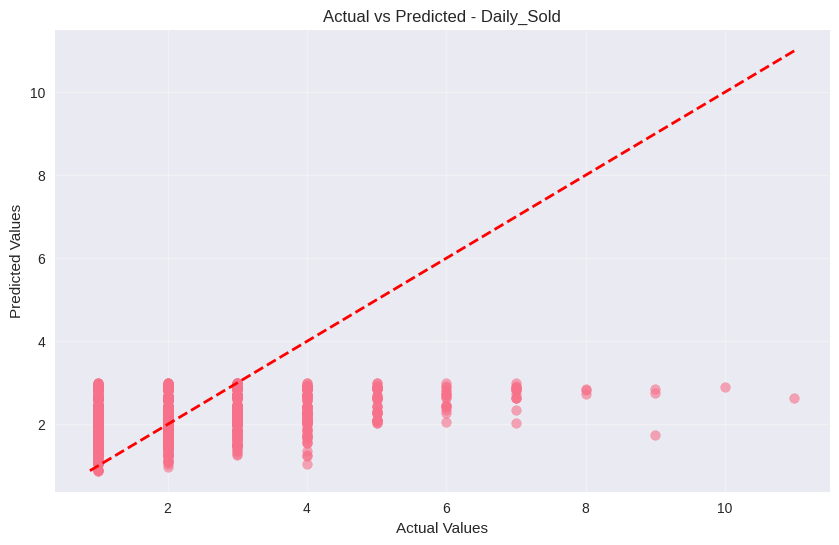

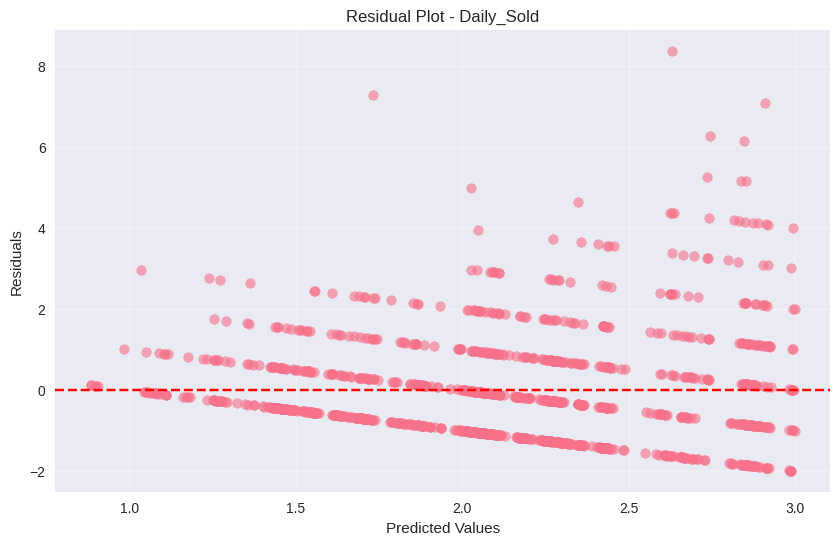


EVALUATION FOR TARGET VARIABLE: Daily_sales
Metrics for Daily_sales:
Mean Squared Error (MSE): 1800.6661
Root Mean Squared Error (RMSE): 42.4343
Mean Absolute Error (MAE): 31.7798
R² Score: 0.1614
--------------------------------------------------


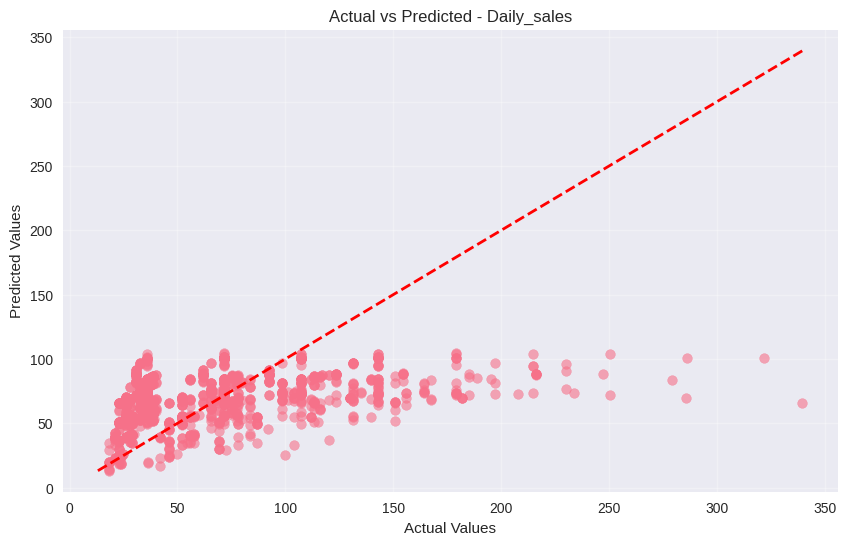

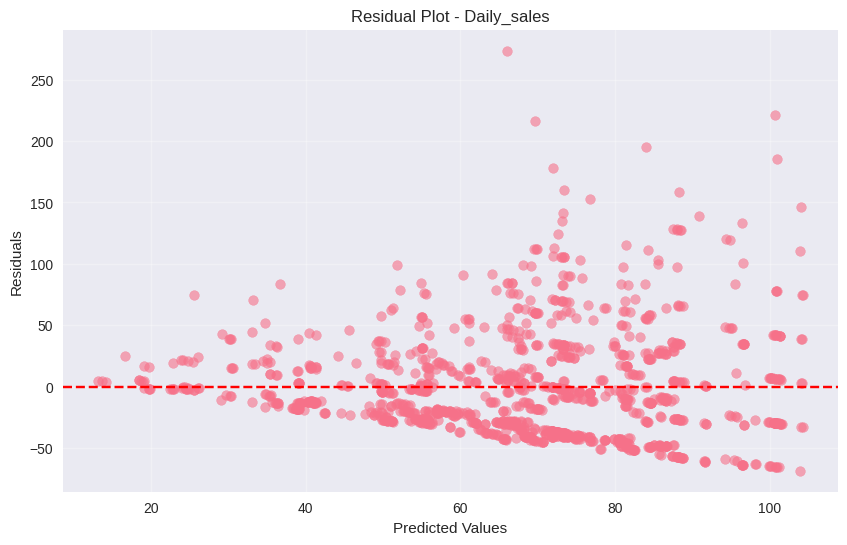

{'Daily_Sold': {'mse': 1.7896343447535055,
  'rmse': np.float64(1.33777215726502),
  'mae': 1.0005476618562952,
  'r2': 0.11588494597745014},
 'Daily_sales': {'mse': 1800.666140344961,
  'rmse': np.float64(42.43425668425171),
  'mae': 31.77981838776211,
  'r2': 0.1614340519429529}}

In [ ]:
# Usando o modelo para prever quantidade vendida diária e quantidade de vendas diária
# Using the model to predict daily quantity sold and daily quantity sales
y_train_pred_dt = model.predict(x_train)  # Using the model to predict y values on the training dataset

# Usando função de avaliação para mostrar métricas de erro e gráficos
# Using evaluation function to display error metrics and graphics
evaluate_multiple_targets(y_train, y_train_pred_dt, target_names=["Daily_Sold", "Daily_sales"])

⚠️**Resultados:** Podemos perceber, através dos gráficos e dos valores das métricas de erro e R², que o modelo linear não se ajustou bem aos dados. Ele preveu valores alto demais em relação aos valores reais, e também os residuos mostraram claro padrão, o que indica que o modelo é simples demais para capturar mudanças em vendas diárias e quantidade de café vendida diariamente, explicando apenas 16% e 11% dos dados, respectivamente.

⚠️**Results:** We can notice based on the graphics and error metrics and R-squared values that the linear model did not fit data well. It predicted values way above the real values, and also the residual plots show clear pattern, which indicates that the model is too simple to capture changes in daily sales and daily quantity of coffee sold, explaining only 16% and 11% of the data, respectively.

⚠️**Variação da série temporal:** Já que durante a análise exploratória percebemos alguns padrões não lineares, e o modelo linear não se ajustou bem aos dados, aqui iremos fazer uma decomposição da série temporal para enxergar padrões temporais.

⚠️**Time-series variation:** Since during exploratory analysis we noticed some non-linear patterns, and the linear model did not fit the data well, here we will decompose the time series to see temporal patterns.

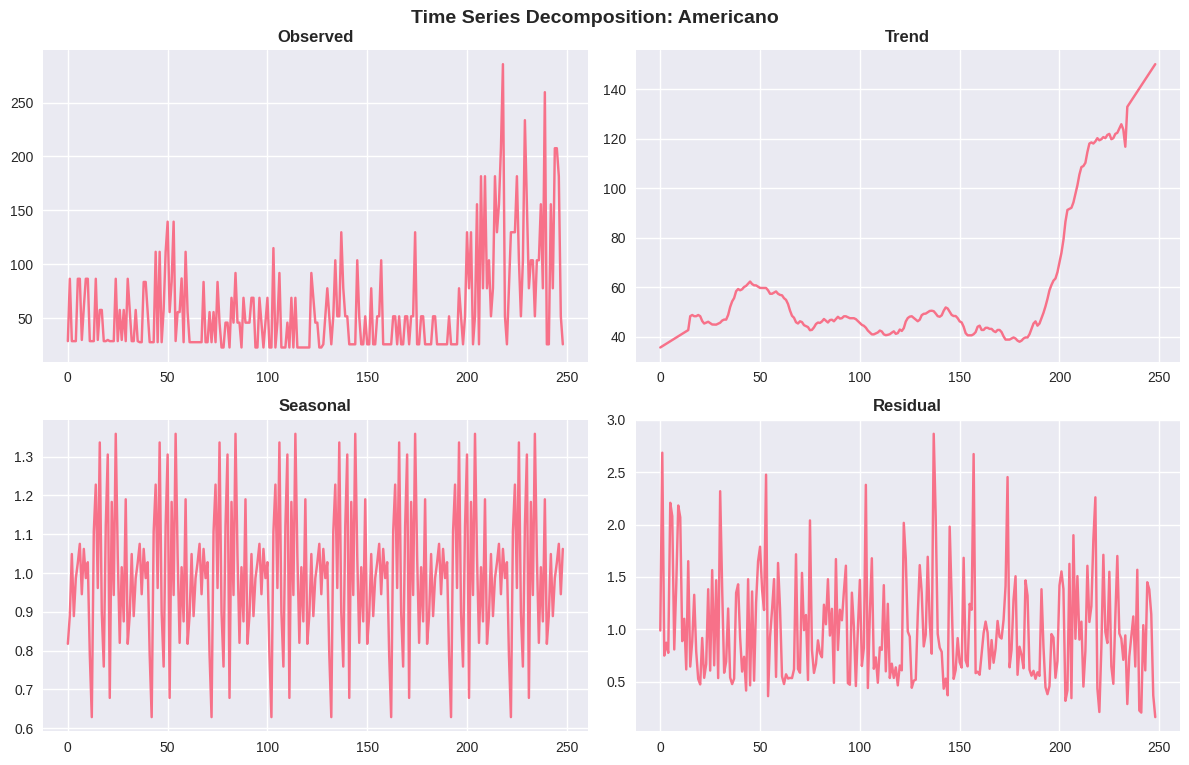

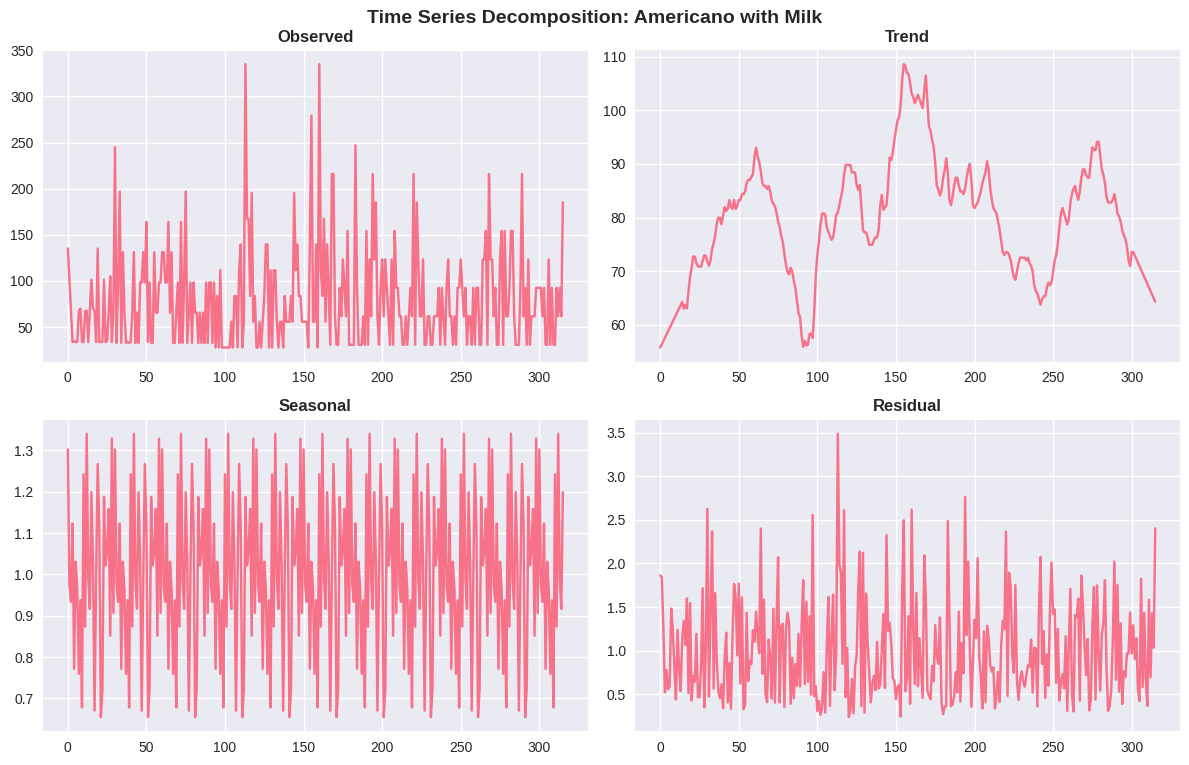

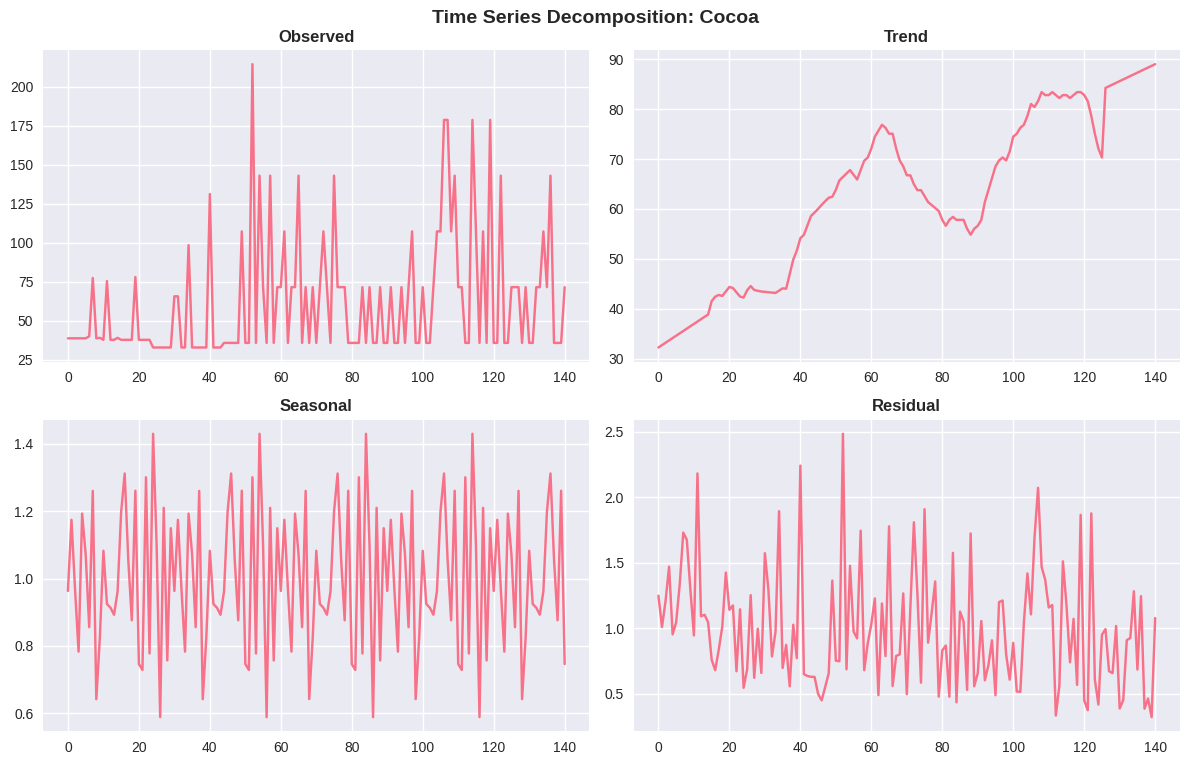

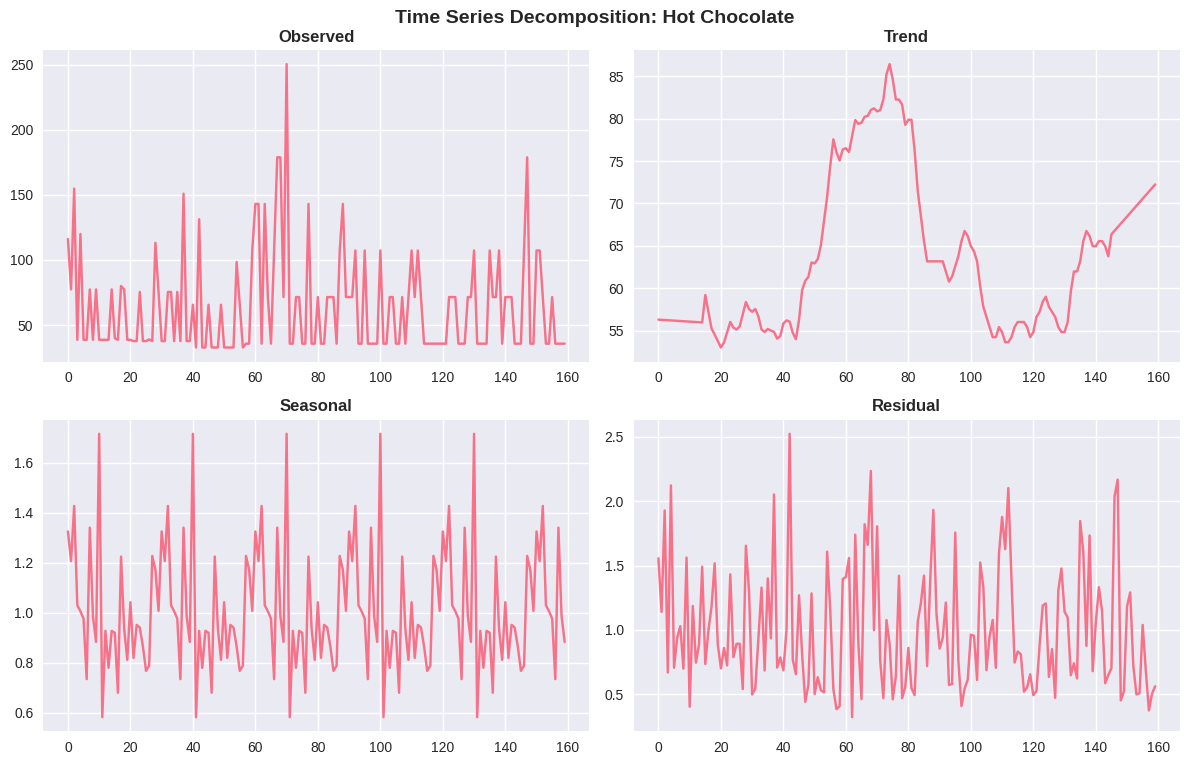

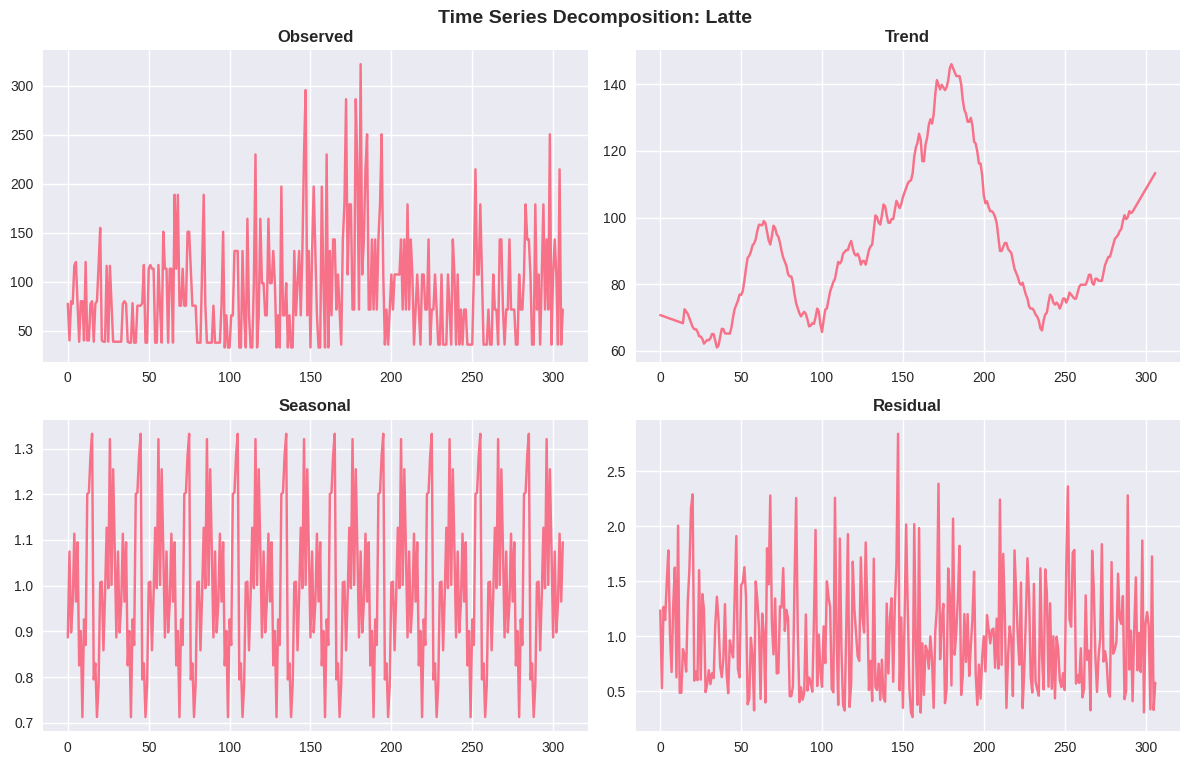

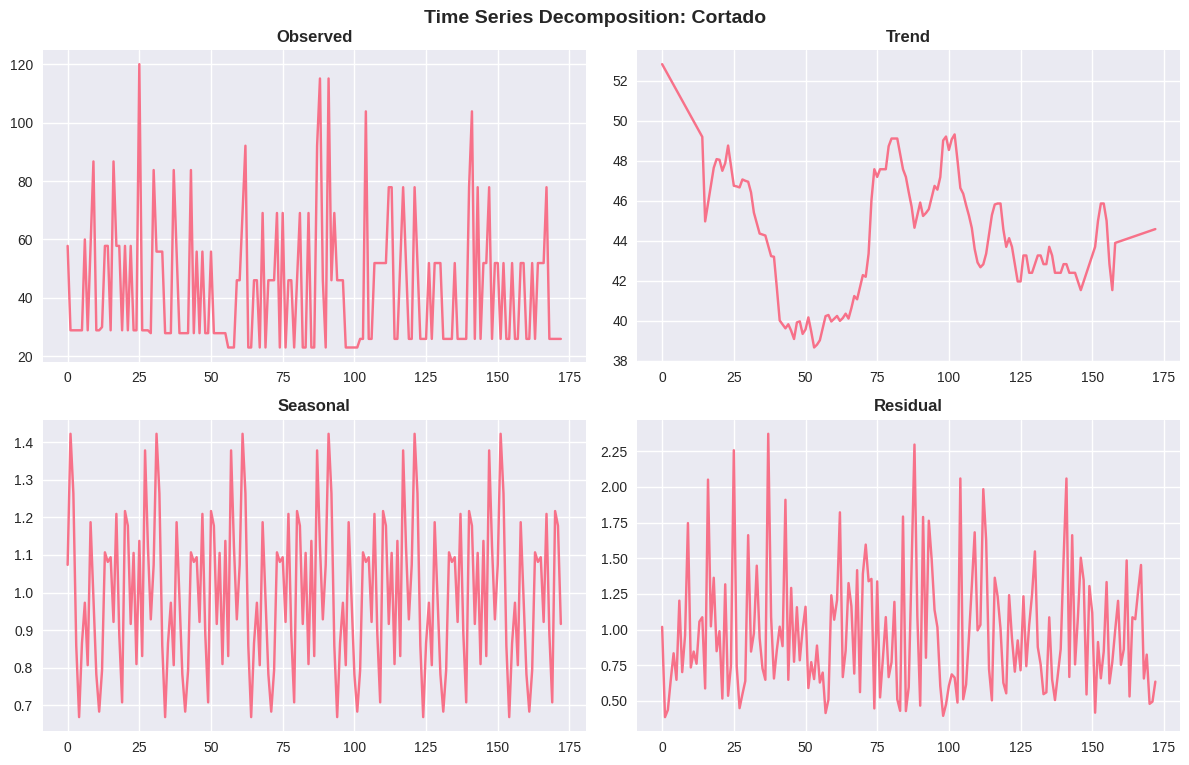

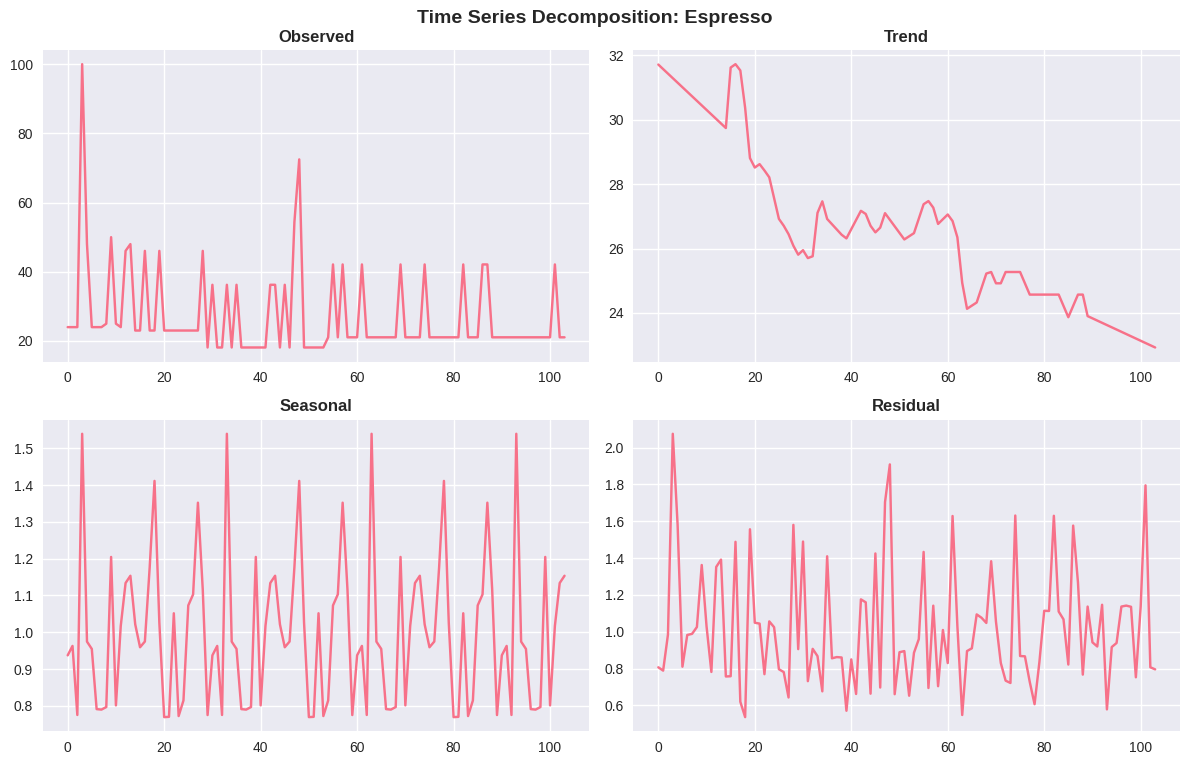

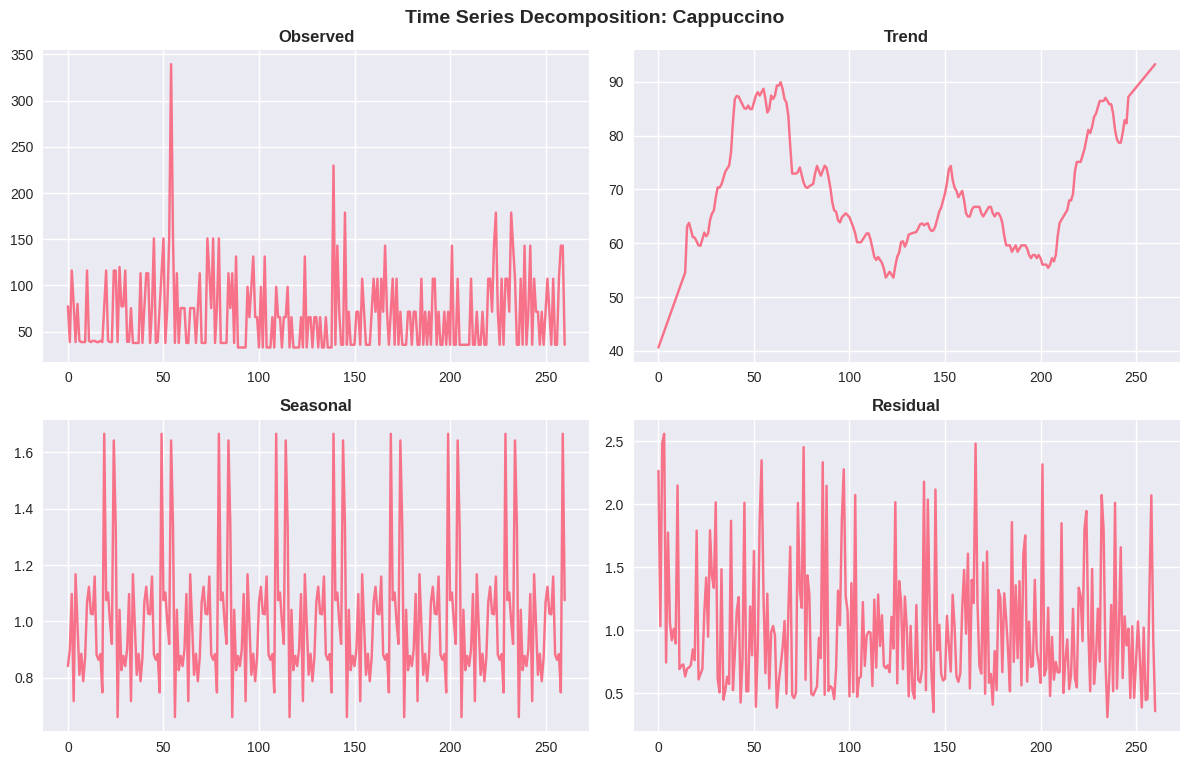

In [ ]:
# Decomposição temporal de vendas diárias com valores observados, padrão de tendência temporal e sazonal e comportamento residual para cada café
# Temporal decomposition of daily sales with observed values, temporal and seasonal tendency pattern and residual behaviour for each coffee
for coffee in daily_data['coffee_name'].unique():
    coffee_data = daily_data[daily_data['coffee_name'] == coffee]
    if len(coffee_data) > 50:
        try:
            result = seasonal_decompose(coffee_data['Daily_sales'].values,
                                      period=30,
                                      model='multiplicative',
                                      extrapolate_trend='freq')


            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

            # Plot each component
            ax1.plot(result.observed)
            ax1.set_title('Observed', fontweight='bold')

            ax2.plot(result.trend)
            ax2.set_title('Trend', fontweight='bold')

            ax3.plot(result.seasonal)
            ax3.set_title('Seasonal', fontweight='bold')

            ax4.plot(result.resid)
            ax4.set_title('Residual', fontweight='bold')

            # Add main title with proper spacing
            plt.suptitle(f'Time Series Decomposition: {coffee}', fontsize=14, fontweight='bold', y=0.95)


            plt.tight_layout()
            plt.subplots_adjust(top=0.90)

            plt.show()

        except Exception as e:
            print(f"Could not decompose {coffee}: {e}")

📝 **Observações:** Para todos os cafés há padrões sazonais e não-lineares, e entre alguns cafés há tendências temporais opostas.

📝 **Observations:** For all coffees there are seasonal and non-linear patterns, and between some coffees there are opposing temporal tendencies.

**Observações:** Vamos checar se nossas variáveis dependentes possuem relação linear.

**Observations:** We will check if our dependent variables have a linear relationship.

<Axes: xlabel='Daily_Sold', ylabel='Daily_sales'>

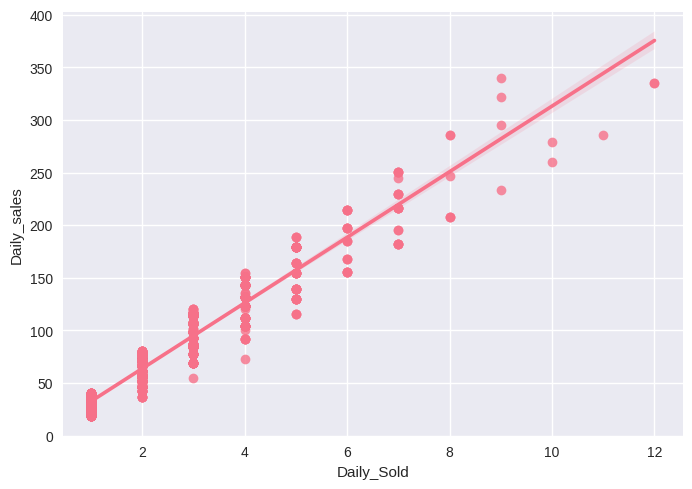

In [ ]:
# Relação linear entre quantidade vendida diária e quantidade de vendas diária
# Linear relationship between daily quantity sold and daily quantity sales
sns.regplot(daily_data, x='Daily_Sold', y='Daily_sales')

📝 **Observações:** Há uma relação linear perfeita entre elas. Assim, as vendas diárias (lucro) aumentam com o aumento da quantidade vendida de café.

📝 **Observations:** There is a perfect linear relationship between them. Thus, daily sales (profit) increase as the daily units of coffee increase.

### 🔍 Análise estatística com modelo de rede neural | Statistical analysis with neural network model

In [ ]:
# Criando função para preparar dados para treinamento com network neural que lida com dados futuros
# Creating function to prepare data for neural network training that deals with future data
# Revised data preparation function
def prepare_nn_data(daily_data, lag_days=30, for_training=True):
    """
    Prepare data for neural network training with proper future data handling
    """
    df = daily_data.copy()

    df['day_of_week'] = df['date'].dt.dayofweek
    df['day_of_month'] = df['date'].dt.day
    df['week_of_year'] = df['date'].dt.isocalendar().week
    df['month'] = df['date'].dt.month
    df['quarter'] = df['date'].dt.quarter


    le = LabelEncoder()
    df['coffee_encoded'] = le.fit_transform(df['coffee_name'])

    # Criando variáveis de atraso temporal de 7 dias em preço, quantidade vendida e quantidade de vendas
    # Creating 7 days time lag features for price, daily sales and daily sold
    if for_training:

        for lag in [7]:
            df[f'price_lag_{lag}'] = df.groupby('coffee_name')['price'].shift(lag)
            df[f'sales_lag_{lag}'] = df.groupby('coffee_name')['Daily_sales'].shift(lag)
            df[f'sold_lag_{lag}'] = df.groupby('coffee_name')['Daily_Sold'].shift(lag)

        # Calculando a média de 7 dias para preço, quantidade de vendas e quantidade vendida
        # Calculating the 7 days average for price, daily sales and daily sold
        for window in [7]:
            df[f'price_rolling_mean_{window}'] = df.groupby('coffee_name')['price'].transform(
                lambda x: x.rolling(window=window, min_periods=1).mean()
            )
            df[f'sales_rolling_mean_{window}'] = df.groupby('coffee_name')['Daily_sales'].transform(
                lambda x: x.rolling(window=window, min_periods=1).mean()
            )
            df[f'sold_rolling_mean_{window}'] = df.groupby('coffee_name')['Daily_Sold'].transform(
                lambda x: x.rolling(window=window, min_periods=1).mean()
            )

        # Calculando a diferença de preço e quantidade de vendas entre o dia anterior e o dia atual para cada café
        # Calculating the price and daily sales difference between last and current for each coffee
        df['price_diff_1'] = df.groupby('coffee_name')['price'].diff(1)
        df['sales_diff_1'] = df.groupby('coffee_name')['Daily_sales'].diff(1)


    # Criando colunas com informação em relação à final de semana e fim de mês
    # Creating columns with information associated with weekend and end of the month
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
    df['is_month_end'] = (df['day_of_month'] >= 25).astype(int)

    # Excluindo as colunas date e coffee_name
    # Dropping date and coffee_name columns
    df = df.drop(['date', 'coffee_name'], axis=1)

    # Excluindo linhas com valores de NA
    # Dropping rows with NA
    if for_training:
        df = df.dropna()

    return df, le

In [ ]:
nn_data, label_encoder = prepare_nn_data(daily_data, for_training=True)

# Separando variáveis dependentes (X) e variáveis independentes (y)
# Separating independent variables (X) and the target variables (y)
X = nn_data.drop(['Daily_sales', 'Daily_Sold'], axis=1)
y = nn_data[['Daily_sales', 'Daily_Sold']]

# Transformando variáveis categóricas em variáveis dummy
# Converting categorical features into dummy
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)

# Normalizando as variáveis, contendo média zero e desvio padrão um
# Scaling features, having zero as mean and one as standard deviation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separando 80% dos dados para treinamento
# Selecting 80% of data for training
train_size = int(len(X_scaled) * 0.8)

# Separando os dados em treinamento e teste
# Splitting training and testing dataset
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Mostrando o número de linhas e colunas dos dados de treinamento e teste
# Displaying number of rows and columns and train and test dataset
print(f"Training shape: X{X_train.shape}, y{y_train.shape}")
print(f"Testing shape: X{X_test.shape}, y{y_test.shape}")

# Função de Regressão com MultiLayer Perceptron com ajuste de hiperparâmetros contendo valores de R²
# Multi-Layer Perceptron Regressor with hyperparameter tuning function with R² scoring
def tune_nn_hyperparameters(X_train, y_train):
    """Perform hyperparameter tuning for the neural network"""
    print("Performing hyperparameter tuning...")

    # Criação do modelo base
    # Creating base model
    base_model = MLPRegressor(
    early_stopping=True,
    n_iter_no_change=5,  # Much more aggressive
    validation_fraction=0.3,
    max_iter=200,  # Reduced maximum iterations
    random_state=42
)

    # Definindo a grid com os parâmetros
    # Defining parameter grid
    param_grid = {
    'estimator__hidden_layer_sizes': [(32, 16), (16, 8), (64)],  # Much simpler
    'estimator__activation': ['relu'],
    'estimator__alpha': [0.1, 0.5, 1.0],  # Much stronger regularization
    'estimator__learning_rate_init': [0.001],
    'estimator__batch_size': [64, 128]  # Larger batches
}

    # Usando validação cruzada para séries temporais
    # Using time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5, gap=30)

    # Gerando output multiplo de regressão com grid search - usando valores de R² (parâmetros que geram maior R² são escolhidos)
    # Create multi-output regressor with grid search - using R² scoring (parameters that lead to highest R² model are chosen)
    grid_search = GridSearchCV(
        MultiOutputRegressor(base_model),
        param_grid,
        cv=tscv,
        scoring='r2',
        n_jobs=-1,
        verbose=1
    )

    # Ajustando grid search para dados de treinamento
    # Fitting grid search for training data
    grid_search.fit(X_train, y_train)

    # Mostrando quais parametros foram escolhidos e o R² mais alto
    # Displaying the chosen parameters and the highest R²
    print("Best parameters found:", grid_search.best_params_)
    print("Best R² score:", grid_search.best_score_)

    return grid_search.best_estimator_


# Treinando o modelo com ajustes de hiperparâmetros
# Training the model with hyperparameter tuning
print("Training neural network with hyperparameter tuning...")
nn_model = tune_nn_hyperparameters(X_train, y_train)

# Previsões para dados de treinamento e teste
# Predictions for training and testing data
y_train_pred = nn_model.predict(X_train)
y_test_pred = nn_model.predict(X_test)

# Calculando metricas de error e R²
# Calculating error metrics and R²
def calculate_metrics(y_true, y_pred, target_names):
    metrics = {}
    for i, target in enumerate(target_names):
        metrics[f'{target}_mae'] = mean_absolute_error(y_true.iloc[:, i], y_pred[:, i])
        metrics[f'{target}_rmse'] = np.sqrt(mean_squared_error(y_true.iloc[:, i], y_pred[:, i]))
        metrics[f'{target}_mape'] = np.mean(np.abs((y_true.iloc[:, i] - y_pred[:, i]) /
                                                 (y_true.iloc[:, i] + 1e-8))) * 100
        # Add R² score
        metrics[f'{target}_r2'] = r2_score(y_true.iloc[:, i], y_pred[:, i])
    return metrics

# Cálculo das métricas para quantidade vendida diária e quantidade de vendas diária para dados de treinamento e teste
# Calculation of metrics for daily quantity sold and daily sales for training and testing data
train_metrics = calculate_metrics(y_train, y_train_pred, ['Daily_sales', 'Daily_Sold'])
test_metrics = calculate_metrics(y_test, y_test_pred, ['Daily_sales', 'Daily_Sold'])

print("\n=== Neural Network Performance ===")
print("Training Metrics:")
for metric, value in train_metrics.items():
    if 'r2' in metric:
        print(f"  {metric}: {value:.4f}")  # 4 decimal places for R²
    else:
        print(f"  {metric}: {value:.2f}")

print("\nTest Metrics:")
for metric, value in test_metrics.items():
    if 'r2' in metric:
        print(f"  {metric}: {value:.4f}")  # 4 decimal places for R²
    else:
        print(f"  {metric}: {value:.2f}")

# Criando função para previsão futura
# Creating future forecasting function
def forecast_future_nn_simple(daily_data, nn_model, scaler, label_encoder, periods=180):
    """
    Simplified future forecasting without lag features for future data
    """
    future_forecasts = []
    coffee_types = daily_data['coffee_name'].unique()

    for coffee in coffee_types:
        print(f"Forecasting for {coffee}...")

        # Pegando a ultima linha para cada café
        # Getting the last row for each coffee
        coffee_data = daily_data[daily_data['coffee_name'] == coffee]
        last_row = coffee_data.iloc[-1:].copy()

        # Gerando datas futuras
        # Creating future dates
        last_date = pd.to_datetime(last_row['date'].iloc[0])
        future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=periods, freq='D')

        # Pegando o último dado conhecido de determinada data e replicando ele para cada data futura para aprendizagem do modelo de previsão
        # Taking the last known data point of each date and replicating it for each future date for the learning of the forecasting model
        for future_date in future_dates:
            future_row = last_row.copy()
            future_row['date'] = future_date

            # Update basic features
            future_row['Order_day'] = future_date.day
            future_row['Order_month'] = future_date.month
            future_row['Order_year'] = future_date.year

            future_forecasts.append(future_row)

    # Juntando os dados de previsão futura para cada café
    # Combining all coffee future forecasts
    future_df = pd.concat(future_forecasts, ignore_index=True)

    # Preparando os dados futuros (sem variáveis lag)
    # Preparing future data (without lag features)
    future_prepared, _ = prepare_nn_data(future_df, for_training=False)

    # Guardando os nomes das colunas usadas no treinamento
    # Getting the feature columns used during training
    training_columns = X.columns.tolist()

    # Certificando-se que os dados futuros possuem todas as colunas de treinamento
    # Ensuring future data has all the training columns
    for col in training_columns:
        if col not in future_prepared.columns:
            # Se variáveis lag não existem, use o último valor conhecido
            # If lag features that don't exist, use the last known value
            if 'lag' in col or 'rolling' in col or 'diff' in col:
                # Use a média dos dados de treinamento como default razoável
                # Use the mean value from training data as a reasonable default
                future_prepared[col] = X[col].mean() if col in X.columns else 0
            else:
                future_prepared[col] = 0

    # Reordeando as colunas para igualar os dados de treinamento
    # Reordering columns to match training data
    future_prepared = future_prepared[training_columns]

    # Normalizando e prevendo os dados futuros
    # Scaling and predicting future data
    future_scaled = scaler.transform(future_prepared)
    future_predictions = nn_model.predict(future_scaled)

    # Adicionando as previsões à dataframe para Daily_sales e Daily_Sold
    # Adding predictions to future dataframe for Daily_sales and Daily_Sold
    future_df['Daily_sales_pred'] = future_predictions[:, 0]
    future_df['Daily_Sold_pred'] = future_predictions[:, 1]
    future_df['is_forecast'] = True

    return future_df

# Gerando previsões futuras com abordagem simplificada
# Generating forecasts with the simplified approach
print("\nGenerating future forecasts...")
future_forecasts = forecast_future_nn_simple(daily_data, nn_model, scaler, label_encoder)

# Criando função para mostrar os resultados de forma compreensiva
# Creating a function to display results in a comprehensive way
def create_final_results_simple(daily_data, future_forecasts, nn_model, scaler):
    """
    Create final dataframe with original data and forecasts
    """
    # Preparando os dados originais para previsão (com variáveis lag)
    # Preparing original data for predictions (with lag features)
    original_prepared, _ = prepare_nn_data(daily_data, for_training=True)
    original_prepared = original_prepared.reindex(columns=X.columns, fill_value=0)
    original_scaled = scaler.transform(original_prepared)

    # Previsão nos dados originais
    # Prediction on original data
    original_predictions = nn_model.predict(original_scaled)

    # Adicionando previsões dos dados originais à dataframe dos dados originais
    # Adding predictions on original data to original data
    results_df = daily_data.copy()
    results_df = results_df.merge(
        pd.DataFrame({
            'Daily_sales_pred': original_predictions[:, 0],
            'Daily_Sold_pred': original_predictions[:, 1]
        }, index=original_prepared.index),
        left_index=True, right_index=True, how='left'
    )

    results_df['is_forecast'] = False

    # Concatenando os dados originais contendo valores preditos com previsões futuras
    # Combining original data having predicted values with future forecasts
    final_df = pd.concat([results_df, future_forecasts], ignore_index=True)

    # Calculando métricas de erro para dados não associados com previsão futura
    # Calculating errors for non-forecast rows
    mask = ~final_df['is_forecast']
    final_df.loc[mask, 'sales_error'] = final_df.loc[mask, 'Daily_sales'] - final_df.loc[mask, 'Daily_sales_pred']
    final_df.loc[mask, 'sold_error'] = final_df.loc[mask, 'Daily_Sold'] - final_df.loc[mask, 'Daily_Sold_pred']
    final_df.loc[mask, 'sales_abs_error'] = abs(final_df.loc[mask, 'sales_error'])
    final_df.loc[mask, 'sold_abs_error'] = abs(final_df.loc[mask, 'sold_error'])

    return final_df.sort_values(['coffee_name', 'date'])

# Criando dataframe com resultados finais
# Creating dataframe with final results
final_results = create_final_results_simple(daily_data, future_forecasts, nn_model, scaler)

# Função para categorizar os meses em estações do ano
# Function to get season from month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Obtendo previsões mensais dos próximos 6 meses para cada café
# Obtaining monthly predictions for the next 6 months for each coffee
def create_monthly_forecast_df(final_results, months_ahead=6):
    """
    Create a dataframe with monthly predictions for each coffee_name
    """

    forecast_data = final_results[final_results['is_forecast']].copy()

    forecast_data['month'] = pd.to_datetime(forecast_data['date']).dt.month
    forecast_data['year'] = pd.to_datetime(forecast_data['date']).dt.year
    forecast_data['month_year'] = pd.to_datetime(forecast_data['date']).dt.to_period('M')

    # Extraindo a última data e depois o último mês disponível nos dados
    # Extracting the last date and then the last month available in the data
    last_original_date = pd.to_datetime(final_results[~final_results['is_forecast']]['date'].max())
    last_month = last_original_date.to_period('M')

    # Gerando datas dos próximos 6 meses (months_ahead)
    # Generating dates of the next 6 months (months_ahead)
    next_months = [last_month + i for i in range(1, months_ahead + 1)]

    # Filtrando apenas linhas que correspondem a meses futuros que irão ter resultado de previsão
    # Filtering to keep only rows that correspond to future months that will have future forecast
    forecast_data = forecast_data[forecast_data['month_year'].isin(next_months)]

    # Agregando por café e mes_ano, pegando o primeiro mês e ano e somando os valores preditos de quantidade vendida e quantidade de vendas diária
    # Aggregating by coffee name and month_year, taking the first month and year and summing up predicted daily sales and daily sold
    monthly_forecast = forecast_data.groupby(['coffee_name', 'month_year']).agg({
        'Daily_sales_pred': 'sum',
        'Daily_Sold_pred': 'sum',
        'month': 'first',
        'year': 'first'
    }).reset_index()

    # Adicionando informação de estação
    # Adding season information
    monthly_forecast['Season'] = monthly_forecast['month'].apply(get_season)

    # Convertendo month_year para tipo datetime
    # Converting month_year to datetime
    monthly_forecast['forecast_month'] = monthly_forecast['month_year'].dt.to_timestamp()

    # Adicionando algumas colunas dos dados originais
    # Adding some original columns
    original_cols = ['coffee_name','price']

    # Mesclando colunas dos dados originais com dados de previsão mensal
    # Merging original data columns with monthly forecasting data
    original_data_summary = daily_data.groupby('coffee_name').first().reset_index()
    monthly_forecast = monthly_forecast.merge(
        original_data_summary[original_cols],
        on='coffee_name',
        how='left'
    )

    # Renomeando as colunas
    # Renaming columns
    monthly_forecast = monthly_forecast.rename(columns={
        'Daily_sales_pred': 'Monthly_Sales_Forecast',
        'Daily_Sold_pred': 'Monthly_Units_Forecast',
        'month_year': 'Month_Year'
    })

    # Selecionando e ordenando as colunas
    # Selecting and ordering columns
    result_columns = original_cols + [
        'Month_Year', 'forecast_month', 'month', 'year', 'Season',
        'Monthly_Sales_Forecast', 'Monthly_Units_Forecast'
    ]

    return monthly_forecast[result_columns].sort_values(['coffee_name', 'forecast_month'])

# Dataframe final com previsões mensais
# Final monthly forecast dataframe
print("\nCreating monthly forecast dataframe...")
monthly_forecast_df = create_monthly_forecast_df(final_results, months_ahead=6)

print("Monthly forecast dataframe shape:", monthly_forecast_df.shape)
print("\nFirst few rows of monthly forecast:")
print(monthly_forecast_df.head())

print("\n=== Process Complete ===")
print(f"Created monthly forecasts for {len(monthly_forecast_df['coffee_name'].unique())} coffee types")
print(f"Forecast period: {monthly_forecast_df['Month_Year'].min()} to {monthly_forecast_df['Month_Year'].max()}")


Training shape: X(1324, 25), y(1324, 2)
Testing shape: X(331, 25), y(331, 2)
Training neural network with hyperparameter tuning...
Performing hyperparameter tuning...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found: {'estimator__activation': 'relu', 'estimator__alpha': 1.0, 'estimator__batch_size': 64, 'estimator__hidden_layer_sizes': (32, 16), 'estimator__learning_rate_init': 0.001}
Best R² score: 0.5647985709330762

=== Neural Network Performance ===
Training Metrics:
  Daily_sales_mae: 14.46
  Daily_sales_rmse: 20.53
  Daily_sales_mape: 25.76
  Daily_sales_r2: 0.8038
  Daily_Sold_mae: 0.44
  Daily_Sold_rmse: 0.62
  Daily_Sold_mape: 24.63
  Daily_Sold_r2: 0.8012

Test Metrics:
  Daily_sales_mae: 21.37
  Daily_sales_rmse: 30.68
  Daily_sales_mape: 28.83
  Daily_sales_r2: 0.6539
  Daily_Sold_mae: 0.67
  Daily_Sold_rmse: 0.95
  Daily_Sold_mape: 30.61
  Daily_Sold_r2: 0.7084

Generating future forecasts...
Forecasting for Americano...
Forecasting for Am

⚠️**Observações:** Ao contrário da regressão linear, o modelo de rede neural explicou 80% dos dados de treinamento tanto para vendas (lucro) quanto para unidades vendidas. Enquanto para os dados teste, o modelo explicou 65% das vendas e 70% da quantidade vendida. Não há sinais de overfitting ou underfitting. Sendo assim os resultados encontrados são considerados razoáveis e as previsões futuras adequadas.

⚠️**Observations:** Contrary to linear regression, the neural network model explained 80% of the training data for sales (profit) and units sold. Meanwhile, for the testing data, the model explained 65% of sales and 70% of units sold. There are no signs overfitting or underfitting. Thus, the results found are considered reasonable and the future forecast appropriate.

**Gráficos dos resultados:** Agora iremos criar uma função para plotar os resultados de forma iterativa.

**Result Graphics:** Now we will create a function to plot the results in a iteractive way.

In [ ]:
# Definindo funções para plotar resultados finais
# Defining Plotting functions
def plot_interactive_forecast(final_results, coffee_name):
    """
    Create interactive plot with Plotly for individual coffee
    """
    plot_data = final_results[final_results['coffee_name'] == coffee_name].copy()
    plot_data['date'] = pd.to_datetime(plot_data['date'])

    fig = make_subplots(rows=2, cols=1, subplot_titles=('Sales Forecast', 'Units Forecast'))

    # Plot para quantidade de vendas reais vs quantidade de vendas preditas
    # Sales plot of actual vs predicted values
    actual_sales = plot_data[~plot_data['is_forecast']]
    forecast_sales = plot_data[plot_data['is_forecast']]

    fig.add_trace(go.Scatter(x=actual_sales['date'], y=actual_sales['Daily_sales'],
                            mode='lines', name='Actual Sales', line=dict(color='blue')),
                 row=1, col=1)

    fig.add_trace(go.Scatter(x=actual_sales['date'], y=actual_sales['Daily_sales_pred'],
                            mode='lines', name='Predicted Sales', line=dict(color='red', dash='dash')),
                 row=1, col=1)

    if not forecast_sales.empty:
        fig.add_trace(go.Scatter(x=forecast_sales['date'], y=forecast_sales['Daily_sales_pred'],
                                mode='lines', name='Forecast Sales', line=dict(color='green')),
                     row=1, col=1)

    # Plot para quantidade de unidades vendidas reais vs quantidade de unidades vendidas preditas
    # Units plot of actual vs predicted values
    fig.add_trace(go.Scatter(x=actual_sales['date'], y=actual_sales['Daily_Sold'],
                            mode='lines', name='Actual Units', line=dict(color='blue')),
                 row=2, col=1)

    fig.add_trace(go.Scatter(x=actual_sales['date'], y=actual_sales['Daily_Sold_pred'],
                            mode='lines', name='Predicted Units', line=dict(color='red', dash='dash')),
                 row=2, col=1)

    if not forecast_sales.empty:
        fig.add_trace(go.Scatter(x=forecast_sales['date'], y=forecast_sales['Daily_Sold_pred'],
                                mode='lines', name='Forecast Units', line=dict(color='green')),
                     row=2, col=1)

    fig.update_layout(height=600, width=1000, title_text=f"Forecast for {coffee_name}")
    fig.show()

# Função para plots interativo dos erros dos resultados
# Function for results errors interactive plots
def plot_interactive_error_analysis(final_results, coffee_name):
    """
    Create interactive error analysis plots with Plotly
    """
    error_data = final_results[(~final_results['is_forecast']) & (final_results['coffee_name'] == coffee_name)]

    fig = make_subplots(rows=2, cols=2, subplot_titles=(
        'Sales Prediction Errors', 'Sales Error Distribution',
        'Units Prediction Errors', 'Units Error Distribution'
    ))

    # Scatterplot do erro associado a quantidade vendida
    # Sales error scatterplot
    fig.add_trace(go.Scatter(x=error_data['Daily_sales'], y=error_data['sales_error'],
                            mode='markers', name='Sales Errors', marker=dict(opacity=0.6)),
                 row=1, col=1)
    fig.add_hline(y=0, line=dict(color='red', dash='dash'), row=1, col=1)

    # Histograma do erro associado a quantidade vendida
    # Sales error histogram
    fig.add_trace(go.Histogram(x=error_data['sales_error'], name='Sales Error Dist', nbinsx=50),
                 row=1, col=2)
    fig.add_vline(x=error_data['sales_error'].mean(), line=dict(color='red', dash='dash'),
                 row=1, col=2, annotation_text=f"Mean: {error_data['sales_error'].mean():.2f}")

    # Scatterplot do erro associado a quantidade de vendas
    # Units error scatterplot
    fig.add_trace(go.Scatter(x=error_data['Daily_Sold'], y=error_data['sold_error'],
                            mode='markers', name='Units Errors', marker=dict(opacity=0.6)),
                 row=2, col=1)
    fig.add_hline(y=0, line=dict(color='red', dash='dash'), row=2, col=1)

    # Histograma do erro associado a quantidade de vendas
    # Units error histogram
    fig.add_trace(go.Histogram(x=error_data['sold_error'], name='Units Error Dist', nbinsx=50),
                 row=2, col=2)
    fig.add_vline(x=error_data['sold_error'].mean(), line=dict(color='red', dash='dash'),
                 row=2, col=2, annotation_text=f"Mean: {error_data['sold_error'].mean():.2f}")

    fig.update_layout(height=800, width=1000, title_text=f"Error Analysis for {coffee_name}",
                     showlegend=False)
    fig.show()


# Função para plot interativo das previsões futuras
# Function for interactive plot of future forecast
def plot_interactive_monthly_forecast(monthly_forecast_df, coffee_name):
    """
    Create interactive monthly forecast plot with Plotly
    """
    plot_data = monthly_forecast_df[monthly_forecast_df['coffee_name'] == coffee_name]

    fig = make_subplots(rows=2, cols=1, subplot_titles=('Monthly Sales Forecast', 'Monthly Units Forecast'))

    # Previsão mensal de vendas por estação do ano
    # Monthly Sales forecast by season
    seasons = plot_data['Season'].unique()
    colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Fall': 'orange'}

    for season in seasons:
        season_data = plot_data[plot_data['Season'] == season]
        fig.add_trace(go.Bar(x=season_data['forecast_month'], y=season_data['Monthly_Sales_Forecast'],
                            name=season, marker_color=colors[season], opacity=0.7),
                     row=1, col=1)

    # Previsão mensal de unidades vendidas por estação do ano
    # Montly Units forecast by season
    for season in seasons:
        season_data = plot_data[plot_data['Season'] == season]
        fig.add_trace(go.Bar(x=season_data['forecast_month'], y=season_data['Monthly_Units_Forecast'],
                            name=season, marker_color=colors[season], opacity=0.7, showlegend=False),
                     row=2, col=1)

    fig.update_layout(height=600, width=1000, title_text=f"Monthly Forecast for {coffee_name} by Season",
                     barmode='group')
    fig.update_xaxes(tickangle=45)
    fig.show()

print("\nGenerating interactive visualizations for individual coffee types...")

# Plotando resultados para cada café
# Plotting results for individual coffee types
coffee_types = final_results['coffee_name'].unique()

for coffee in coffee_types:
    print(f"\nPlotting for {coffee}...")
    plot_interactive_forecast(final_results, coffee)
    plot_interactive_error_analysis(final_results, coffee)
    plot_interactive_monthly_forecast(monthly_forecast_df, coffee)

# Mostrando resumo da estatistica descriptiva para cada café
# Printting summary statistics for each coffee
print("\n=== Error Analysis Summary ===")
error_data = final_results[~final_results['is_forecast']]
print(f"Mean Absolute Sales Error: {error_data['sales_abs_error'].mean():.2f}")
print(f"Mean Absolute Units Error: {error_data['sold_abs_error'].mean():.2f}")
print(f"Sales Error Std: {error_data['sales_error'].std():.2f}")
print(f"Units Error Std: {error_data['sold_error'].std():.2f}")

print("\n=== Forecast Summary ===")
forecast_data = final_results[final_results['is_forecast']]
print(f"Forecast period: {forecast_data['date'].min()} to {forecast_data['date'].max()}")
print(f"Total forecast days: {len(forecast_data)}")
print(f"Number of coffee types forecasted: {len(forecast_data['coffee_name'].unique())}")


Generating interactive visualizations for individual coffee types...

Plotting for Americano...



Plotting for Americano with Milk...



Plotting for Cappuccino...



Plotting for Cocoa...



Plotting for Cortado...



Plotting for Espresso...



Plotting for Hot Chocolate...



Plotting for Latte...



=== Error Analysis Summary ===
Mean Absolute Sales Error: 17.52
Mean Absolute Units Error: 0.52
Sales Error Std: 24.01
Units Error Std: 0.73

=== Forecast Summary ===
Forecast period: 2025-03-21 00:00:00 to 2025-09-19 00:00:00
Total forecast days: 1440
Number of coffee types forecasted: 8


**Observações:** Aqui trazemos de volta a variação do preço dos cafés para uma análise mais detalhada nas observações finais e recomendações

**Observations:** Here we bring back coffee price variation for a more detailed analysis for final remarks and recommendations

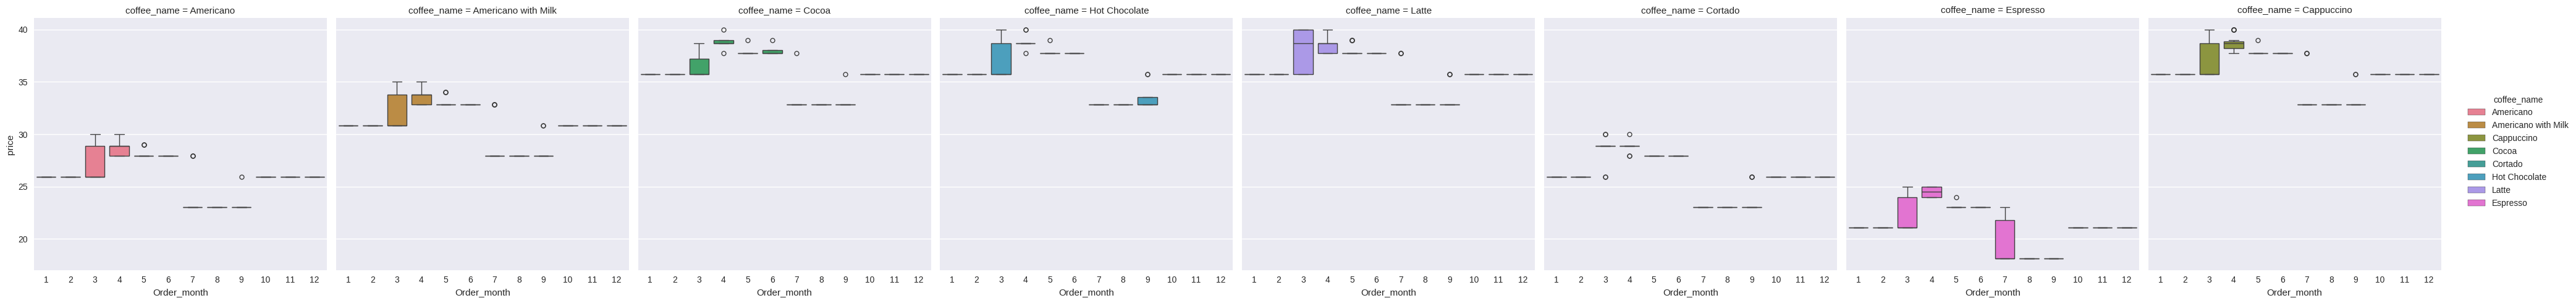

In [ ]:
sns.catplot(daily_data, x='Order_month',y='price',hue='coffee_name', col='coffee_name', kind='box')

### ✅ Considerações e recomendações finais

### ✅ Final remarks and recommendations

**Considerações finais e recomendações:**

Algumas observações interessantes podem ser feitas através dos resultados:

*   Para todos os tipos de café, o mês de Setembro, que corresponde à estação Outono, é esperado que se venda menos unidades de todos cafés e com isso o lucro seja menor

*   Setembro, apesar de previsão de menos vendas, é quando os cafés estão mais baratos

*   Para cafés como: Americano com leite, Cappuccino e Cocoa, no geral, é esperado que no Verão (meses Junho, Julho e Agosto) haja mais unidades vendidas e maior lucro de vendas para esses cafés, que coincide com eles estarem mais baratos

*   É previsto que Cortado e Espresso vendas mais unidades e deem mais lucro na Primavera (Abril e Maio), apesar de nesse período eles serem mais caros do que nos próximos meses

*   Latte foi o café que teve maior previsão de venda de unidades no Outono (Setembro), apesar de no geral seu preço estar bem acima do preço dos outros cafés para o mesmo período

Dessa forma, algumas recomendações são feitas:


*   Na Primavera, é espero que cafés como Espresso, Americano e Cortado vendam mais unidades comparado aos outros cafés. Como Americano e Espresso não possuem leite, há uma demanda menor de leite para produção café. Assim, recomenda-se menor compra de leite durante a Primavera comparado com Verão e Outono, otimizando assim os recursos financeiros

*   Setembro é o mês com menos vendas e menor lucro, curiosamente é quando os preços estão mais baixos, exceto para Latte que é o que mais vende no período. Assim, há um indicativo de que no Outono, Latte é preferido pelos clientes em relação aos outros cafés, independente do preço. Dessa forma, recomenda-se campanhas de marketing e até mesmo descontos promocionais podem promover o café Latte pode atrair mais vendas e gerar mais lucro

*   Apesar dos resultados obtidos, próximos passos como: incluir a mesma quantidade de meses para cada estação para previsão de unidades vendidas e lucro; incluir informações de ingredientes usados e gastos com cada ingrediente, entre outros, podem ajudar a fornecer resultados ainda mais robustos que otimizem os recursos financeiros, atraia clientela e certifiquem de que a demanda por determinado café não seja maior do que sua produção


**Final remarks and recommendations:**

Some interesting observations can be made based on the results:

*   For all coffees, September, which is on the Fall, is expected to lead to less sales for all coffee types and hence making lower profit


*   September, despite the lower sales forecast, is when generally coffees are cheaper


*   For coffes like: American with milk, Cappuccino and Cocoa, in general, it is expected that there will be more units sold and higher profit during Summer (June, July and August), which matches them being cheaper


*   It is expected that Cortado and Espresso sell more units and give higher profit during Spring (April and May), despite them being more experience at such a period compared to the following months


*   Latte had the highest unit sales forecast for Fall (September), despite its price being way above other coffees for the same period


This way, a few recommendations can be given:


*   In spring, it is expected that coffees like Espresso, Americano and Cortado sell more units compared to other coffees. Since Americano and Espresso don't have milk, there is less demand for milk to make coffee. Therefore, it is recommended to buy less milk during Spring compared to Summer and Fall, optimizing finantial resources


*   September is the month with lowest sales and profit, curiously it is when prices are lower, except for Latte, which sells more during such a period. Thus, there is an indication that in Fall, Latte is prefered by clients over other coffees, regardless of price. This way, marketing campaigns and even discounts are recommended to promote Latte and attract more sales and generate higher profit


* Despite that results obtained, next steps like: having the same number of months for all seasons to forecast units sold and profit; including information about ingredients used and expenses for each ingredient, and more, can help generate even more robust results that optimize finantial resources, attract clients and make sure that the demand for a specific coffee is not higher than its production